# Backbone Summary

In [1]:
import networkx as nx
import pickle as pk
import configparser


import matplotlib.pyplot as plt
import pandas as pd
import powerlaw
import numpy as np


config = configparser.ConfigParser()
config.read('networks.ini')
networks = list(config.keys())[1:]

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

/tmp/ipykernel_4692/1909655765.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


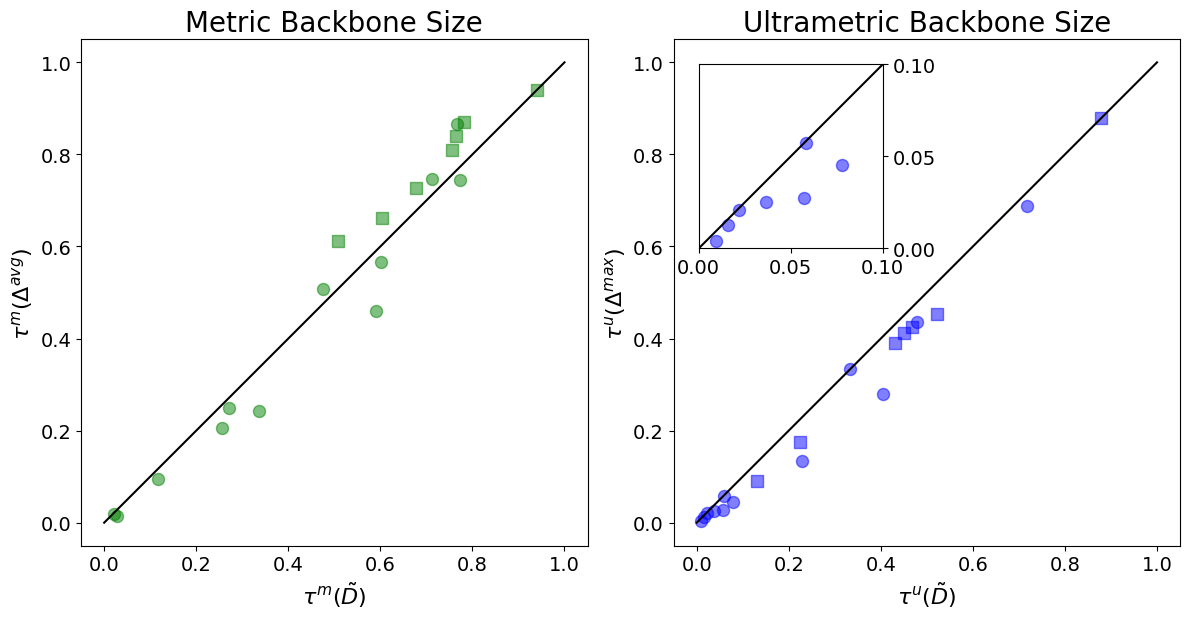

In [25]:
df = pd.read_csv('Summary/UndirectedBackboneStats.csv', index_col=0)

groups = [['comorbidity', 'DDI', 'colombia-calls', 'giraffe', 'colombia-mobility', 'mobility-manizales', 'mobility-medellin', 'bike-sharing', 'caviar-proj', 'yeast-grn', 'us-airports', 'us-weblinks'], 
          ['business-faculty', 'cs-faculty', 'history-faculty', 'celegans-her', 'celegans-male', 'tennis-loss', 'phone-calls']]

group_dict = dict()
for i in range(2):
    for net in groups[i]:
        group_dict[net] = i
df['group'] = group_dict

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
axes = zoomed_inset_axes(ax[1], 4.0, loc=2, borderpad=1.8)

# Same commands for both axis
marker = {0: 'o', 1: 's'}
for name, group in df.groupby('group'):
    ax[0].scatter(group['metric'], group['metric_avg'], marker=marker[name], c='g', alpha=0.5, label='Average', s=75)
    ax[1].scatter(group['ultrametric'], group['ultrametric_max'], marker=marker[name], c='b', alpha=0.5, label='Maximum', s=75)
    axes.scatter(group['ultrametric'], group['ultrametric_max'], marker=marker[name], c='b', alpha=0.5, s=75)

# Identity Line Plot
for i in range(2):
    ax[i].plot([0, 1], [0, 1], 'k-')
    #ax[i].legend(fontsize=12, loc=4)
    ax[i].set_aspect('equal')
    ax[i].tick_params(axis='both', labelsize=14)
axes.plot([0, 0.1], [0, 0.1], 'k-')

# Add labels
ax[0].set_title('Metric Backbone Size', fontsize=20)    
ax[0].set_ylabel(r'$\tau^m(\Delta^{avg})$', fontsize=16)
ax[0].set_xlabel(r'$\tau^m(\tilde{D})$', fontsize=16)

ax[1].set_title('Ultrametric Backbone Size', fontsize=20)    
ax[1].set_ylabel(r'$\tau^u(\Delta^{max})$', fontsize=16)
ax[1].set_xlabel(r'$\tau^u(\tilde{D})$', fontsize=16)


axes.yaxis.tick_right()
axes.set_xlim((0, 0.1))
axes.set_ylim((0, 0.1))
axes.set_aspect('equal')
axes.set_yticks([0.0, 0.05, 0.10])
axes.set_xticks([0.0, 0.05, 0.10])
axes.tick_params(axis='both', labelsize=14)

plt.tight_layout()
plt.show()
#plt.savefig('Figures/BackboneSizeComparison.png', dpi=300)


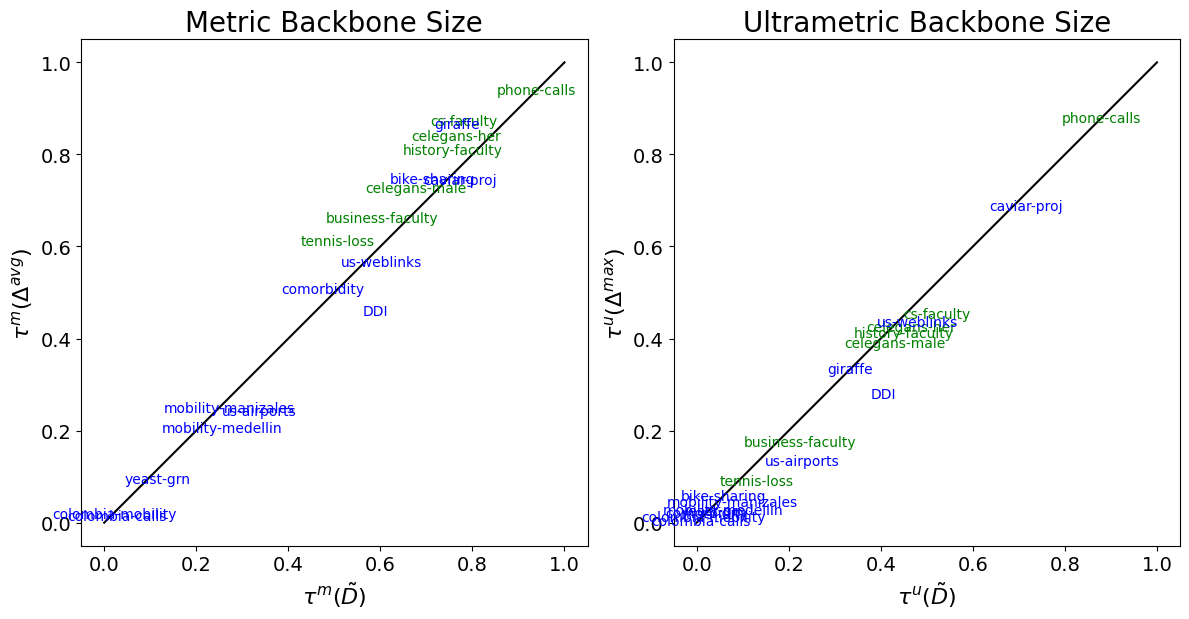

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

color = {0: 'b', 1: 'g'}
# Same commands for both axis
for idx in df.index:
    ax[0].text(df['metric'][idx], df['metric_avg'][idx], idx, horizontalalignment='center', verticalalignment='center', color=color[df['group'][idx]])
    ax[1].text(df['ultrametric'][idx], df['ultrametric_max'][idx], idx, horizontalalignment='center', verticalalignment='center', color=color[df['group'][idx]])

for i in range(2):
    ax[i].plot([0, 1], [0, 1], 'k-')
    #ax[i].legend(fontsize=12, loc=4)
    ax[i].set_aspect('equal')
    ax[i].tick_params(axis='both', labelsize=14)

# Add labels
ax[0].set_title('Metric Backbone Size', fontsize=20)    
ax[0].set_ylabel(r'$\tau^m(\Delta^{avg})$', fontsize=16)
ax[0].set_xlabel(r'$\tau^m(\tilde{D})$', fontsize=16)

ax[1].set_title('Ultrametric Backbone Size', fontsize=20)    
ax[1].set_ylabel(r'$\tau^u(\Delta^{max})$', fontsize=16)
ax[1].set_xlabel(r'$\tau^u(\tilde{D})$', fontsize=16)

plt.tight_layout()
plt.show()
#plt.savefig('Figures/BackboneSizeComparison.png', dpi=300)

In [8]:
df

type  n_nodes  nu_edges  nd_edges    metric  \
business-faculty           Social       84       488       976  0.604508   
cs-faculty                 Social       78       179       358  0.782123   
history-faculty            Social       56       158       316  0.756329   
caviar-proj                Social       63        90       180  0.772222   
celegans-her           Biomedical      215       558      1116  0.765233   
celegans-male          Biomedical      238       634      1268  0.677445   
colombia-calls             Social      863    199898    399796  0.027959   
colombia-mobility   Technological      863     67150    134300  0.022115   
mobility-manizales  Technological       57      1237      2474  0.271221   
mobility-medellin   Technological      413     15503     31006  0.256273   
tennis-loss                Social     1263     16349     32698  0.507799   
yeast-grn              Biomedical     1225     52478    104956  0.116306   
bike-sharing        Technological      721     12626     25252  0.712934   
giraffe                    Social        6        15        30  0.766667   
comorbidity            Biomedical       95      4465      8930  0.474356   
phone-calls                Social       30        33        66  0.939394   
us-airports         Technological      926      6930     13860  0.336652   
DDI                    Biomedical      412      1483      2966  0.590020   
us-weblinks         Technological    18112     49855     99710  0.601785   

                    ultrametric  metric_avg  ultrametric_avg  metric_max  \
business-faculty       0.224385    0.661885         0.172131    0.629098   
cs-faculty             0.522346    0.871508         0.430168    0.815642   
history-faculty        0.449367    0.810127         0.348101    0.765823   
caviar-proj            0.716667    0.744444         0.688889    0.755556   
celegans-her           0.466846    0.840502         0.383513    0.820789   
celegans-male          0.431388    0.727129         0.373817    0.690852   
colombia-calls         0.009622    0.015118         0.004312    0.015703   
colombia-mobility      0.015748    0.018094         0.012837    0.018183   
mobility-manizales     0.078011    0.249798         0.045271    0.265158   
mobility-medellin      0.057311    0.205380         0.026640    0.189770   
tennis-loss            0.130130    0.611414         0.077558    0.537648   
yeast-grn              0.036692    0.093925         0.023324    0.098384   
bike-sharing           0.058451    0.746634         0.057025    0.708300   
giraffe                0.333333    0.866667         0.333333    0.800000   
comorbidity            0.021725    0.506831         0.021053    0.511758   
phone-calls            0.878788    0.939394         0.878788    0.939394   
us-airports            0.228571    0.243146         0.133478    0.226840   
DDI                    0.404922    0.459879         0.277141    0.438975   
us-weblinks            0.479711    0.565801         0.371858    0.585017   

                    ultrametric_max  group  
business-faculty           0.176230      1  
cs-faculty                 0.452514      1  
history-faculty            0.411392      1  
caviar-proj                0.688889      0  
celegans-her               0.424731      1  
celegans-male              0.389590      1  
colombia-calls             0.004317      0  
colombia-mobility          0.012837      0  
mobility-manizales         0.045271      0  
mobility-medellin          0.027156      0  
tennis-loss                0.091076      1  
yeast-grn                  0.025192      0  
bike-sharing               0.057184      0  
giraffe                    0.333333      0  
comorbidity                0.021053      0  
phone-calls                0.878788      1  
us-airports                0.133622      1  
DDI                        0.278490      0  
us-weblinks                0.436546      1

In [9]:
df_scc = pd.read_csv('Summary/BackboneStats_LSCC.csv', index_col=0)
df_scc

type  n_nodes    nedges   density  tau_metric  \
business-faculty           Social     94.0    2842.0  0.325097    0.365236   
cs-faculty                 Social    167.0    2384.0  0.085997    0.528523   
history-faculty            Social    116.0    1897.0  0.142204    0.430153   
caviar-proj                Social     66.0     242.0  0.056410    0.661157   
celegans-her           Biomedical    249.0    3046.0  0.049326    0.553185   
celegans-male          Biomedical    289.0    3206.0  0.038519    0.534311   
colombia-calls             Social    863.0  438484.0  0.589435    0.026015   
colombia-mobility   Technological    863.0  173857.0  0.233708    0.017089   
mobility-manizales  Technological     57.0    2518.0  0.788847    0.266481   
mobility-medellin   Technological    413.0   33884.0  0.199135    0.246724   
tennis-loss                Social   2428.0   98102.0  0.016648    0.582475   
yeast-grn              Biomedical   1229.0  367432.0  0.243460    0.066224   
bike-sharing        Technological    723.0   39974.0  0.076578    0.653450   
giraffe                    Social      6.0      30.0  1.000000    0.766667   
comorbidity            Biomedical     95.0    8930.0  1.000000    0.474356   
phone-calls                Social    114.0     274.0  0.021270    0.883212   
us-airports         Technological    995.0   18820.0  0.019029    0.271095   
DDI                    Biomedical    412.0    2966.0  0.017516    0.590020   
us-weblinks         Technological  27725.0  372626.0  0.000485    0.380035   

                    tau_ultrametric  ultra_per_metric  
business-faculty           0.094652          0.259152  
cs-faculty                 0.220218          0.416667  
history-faculty            0.208751          0.485294  
caviar-proj                0.599174          0.906250  
celegans-her               0.256730          0.464095  
celegans-male              0.268247          0.502043  
colombia-calls             0.008901          0.342158  
colombia-mobility          0.012165          0.711882  
mobility-manizales         0.076648          0.287630  
mobility-medellin          0.054421          0.220574  
tennis-loss                0.211861          0.363725  
yeast-grn                  0.015491          0.233921  
bike-sharing               0.036524          0.055894  
giraffe                    0.333333          0.434783  
comorbidity                0.021725          0.045798  
phone-calls                0.773723          0.876033  
us-airports                0.186291          0.687181  
DDI                        0.404922          0.686286  
us-weblinks                0.256284          0.674369

In [16]:
df = df.join(df_scc, rsuffix='_lscc')

/tmp/ipykernel_4692/1211292497.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


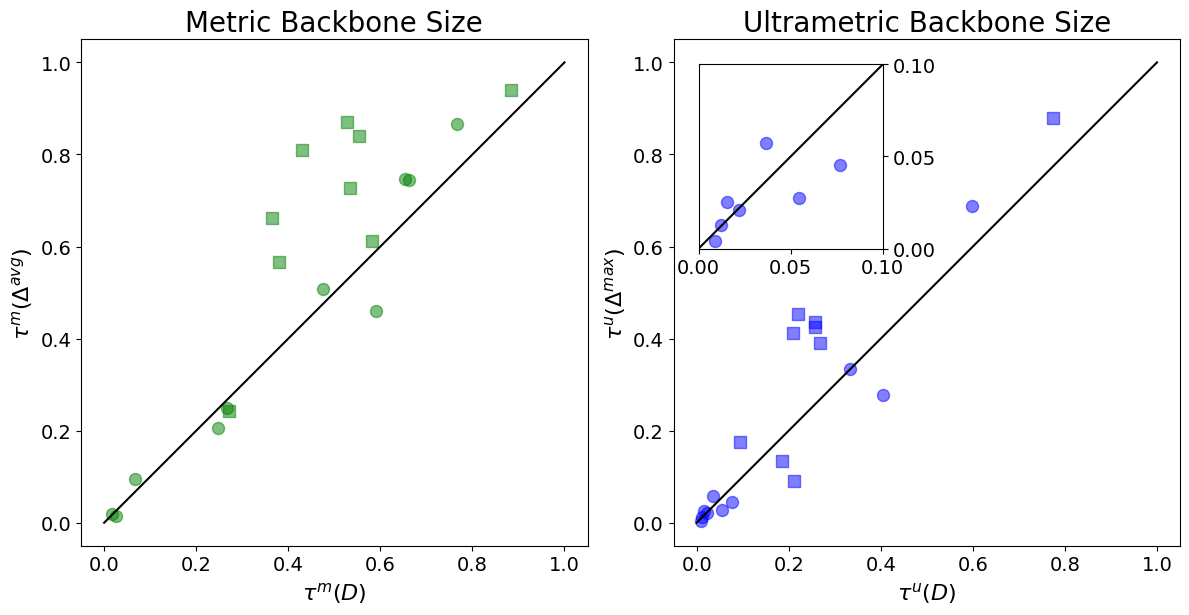

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
axes = zoomed_inset_axes(ax[1], 4.0, loc=2, borderpad=1.8)

# Same commands for both axis
marker = {0: 'o', 1: 's'}
for name, group in df.groupby('group'):
    ax[0].scatter(group['tau_metric'], group['metric_avg'], marker=marker[name], c='g', alpha=0.5, label='Average', s=75)
    ax[1].scatter(group['tau_ultrametric'], group['ultrametric_max'], marker=marker[name], c='b', alpha=0.5, label='Maximum', s=75)
    axes.scatter(group['tau_ultrametric'], group['ultrametric_max'], marker=marker[name], c='b', alpha=0.5, s=75)

# Identity Line Plot
for i in range(2):
    ax[i].plot([0, 1], [0, 1], 'k-')
    #ax[i].legend(fontsize=12, loc=4)
    ax[i].set_aspect('equal')
    ax[i].tick_params(axis='both', labelsize=14)
axes.plot([0, 0.1], [0, 0.1], 'k-')

# Add labels
ax[0].set_title('Metric Backbone Size', fontsize=20)    
ax[0].set_ylabel(r'$\tau^m(\Delta^{avg})$', fontsize=16)
ax[0].set_xlabel(r'$\tau^m(D)$', fontsize=16)

ax[1].set_title('Ultrametric Backbone Size', fontsize=20)    
ax[1].set_ylabel(r'$\tau^u(\Delta^{max})$', fontsize=16)
ax[1].set_xlabel(r'$\tau^u(D)$', fontsize=16)


axes.yaxis.tick_right()
axes.set_xlim((0, 0.1))
axes.set_ylim((0, 0.1))
axes.set_aspect('equal')
axes.set_yticks([0.0, 0.05, 0.10])
axes.set_xticks([0.0, 0.05, 0.10])
axes.tick_params(axis='both', labelsize=14)


plt.tight_layout()
plt.show()
#plt.savefig('Figures/BackboneSizeComparison.png', dpi=300)

## Plotting

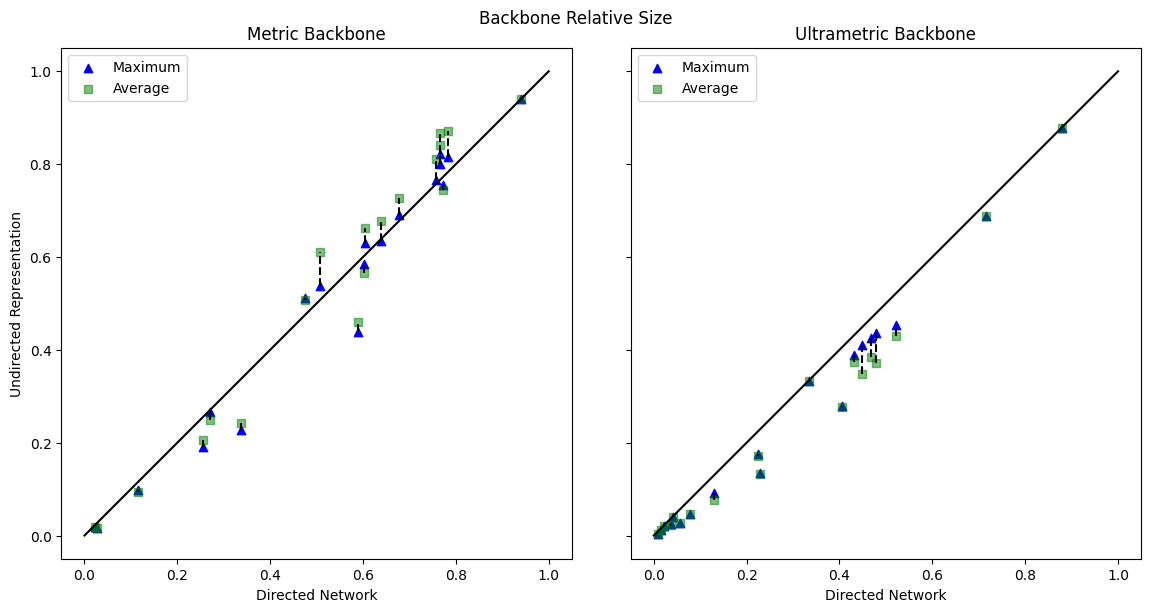

In [5]:
df = pd.read_csv('Summary/BackboneCompareStats.csv', index_col=0)

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Same commands for both axis
for i, btype in enumerate(['metric', 'ultrametric']):
    ax[i].scatter(df[btype], df[f'{btype}_max'], marker='^', c='b', label='Maximum')
    ax[i].scatter(df[btype], df[f'{btype}_avg'], marker='s', c='g', label='Average', alpha=0.5)

    ax[i].vlines(df[btype], ymin=df[[f'{btype}_max', f'{btype}_avg']].min(axis=1), ymax=df[[f'{btype}_max', f'{btype}_avg']].max(axis=1), linestyle='--', color='k')
    ax[i].plot([0, 1], [0, 1], 'k-')
    
    ax[i].legend()
    ax[i].set_aspect('equal')
    ax[i].set_xlabel('Directed Network')
    ax[i].set_title(btype.capitalize() + ' Backbone')
    
# Labels
ax[0].set_ylabel('Undirected Representation')
fig.suptitle('Backbone Relative Size')

plt.tight_layout()
plt.show()

In [6]:
display(df)

n_nodes  nu_edges  nd_edges    metric  ultrametric  \
business-faculty         84       488       976  0.604508     0.224385   
cs-faculty               78       179       358  0.782123     0.522346   
history-faculty          56       158       316  0.756329     0.449367   
caviar-proj              63        90       180  0.772222     0.716667   
celegans-her            215       558      1116  0.765233     0.466846   
celegans-male           238       634      1268  0.677445     0.431388   
colombia-calls          863    199898    399796  0.027959     0.009622   
colombia-mobility       863     67150    134300  0.022115     0.015748   
mobility-manizales       57      1237      2474  0.271221     0.078011   
mobility-medellin       413     15503     31006  0.256273     0.057311   
tennis-loss            1263     16349     32698  0.507799     0.130130   
yeast-grn              1225     52478    104956  0.116306     0.036692   
bike-sharing            723     18055     36110  0.639684     0.040570   
giraffe                   6        15        30  0.766667     0.333333   
comorbidity              95      4465      8930  0.474356     0.021725   
phone-calls              30        33        66  0.939394     0.878788   
us-airports             926      6930     13860  0.336652     0.228571   
DDI                     412      1483      2966  0.590020     0.404922   
us-weblinks           18112     49855     99710  0.601785     0.479711   

                    metric_avg  ultrametric_avg  metric_max  ultrametric_max  
business-faculty      0.661885         0.172131    0.629098         0.176230  
cs-faculty            0.871508         0.430168    0.815642         0.452514  
history-faculty       0.810127         0.348101    0.765823         0.411392  
caviar-proj           0.744444         0.688889    0.755556         0.688889  
celegans-her          0.840502         0.383513    0.820789         0.424731  
celegans-male         0.727129         0.373817    0.690852         0.389590  
colombia-calls        0.015118         0.004312    0.015703         0.004317  
colombia-mobility     0.018094         0.012837    0.018183         0.012837  
mobility-manizales    0.249798         0.045271    0.265158         0.045271  
mobility-medellin     0.205380         0.026640    0.189770         0.027156  
tennis-loss           0.611414         0.077558    0.537648         0.091076  
yeast-grn             0.093925         0.023324    0.098384         0.025192  
bike-sharing          0.676765         0.039989    0.635392         0.040044  
giraffe               0.866667         0.333333    0.800000         0.333333  
comorbidity           0.506831         0.021053    0.511758         0.021053  
phone-calls           0.939394         0.878788    0.939394         0.878788  
us-airports           0.243146         0.133478    0.226840         0.133622  
DDI                   0.459879         0.277141    0.438975         0.278490  
us-weblinks           0.565801         0.371858    0.585017         0.436546

In [7]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

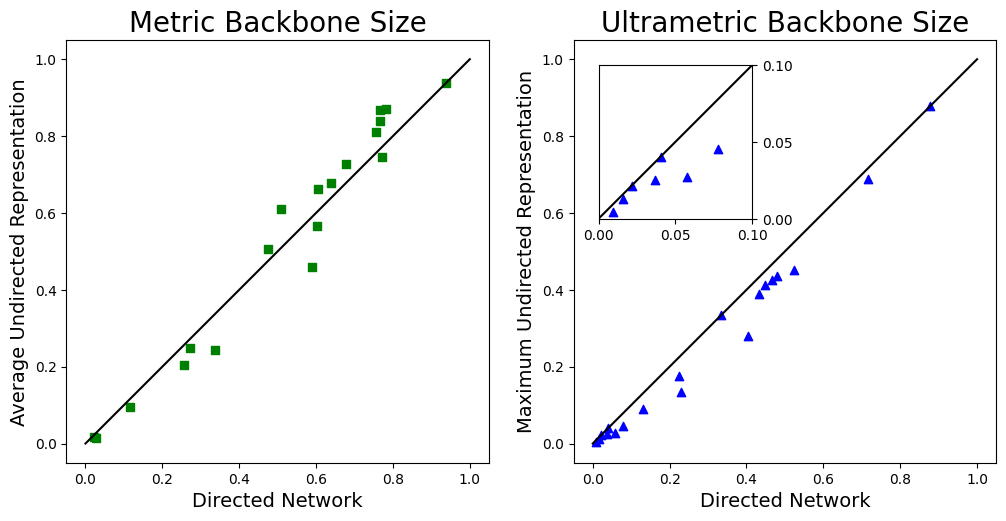

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Same commands for both axis

ax[0].scatter(df['metric'], df[f'metric_avg'], marker='s', c='g', label='Average')
ax[1].scatter(df['ultrametric'], df[f'ultrametric_max'], marker='^', c='b', label='Maximum')

for i in range(2):
    ax[i].plot([0, 1], [0, 1], 'k-')
    #ax[i].legend(fontsize=12, loc=4)
    ax[i].set_aspect('equal')
    ax[i].set_xlabel('Directed Network', fontsize=14)

ax[0].set_title('Metric Backbone Size', fontsize=20)    
ax[0].set_ylabel('Average Undirected Representation', fontsize=14)

ax[1].set_title('Ultrametric Backbone Size', fontsize=20)    
ax[1].set_ylabel('Maximum Undirected Representation', fontsize=14)

# Add Ultrametric inset
axes = zoomed_inset_axes(ax[1], 4.0, loc=2, borderpad=1.8)
axes.scatter(df['ultrametric'], df['ultrametric_max'], marker='^', c='b', label='Maximum')
axes.plot([0, 0.1], [0, 0.1], 'k-')

axes.yaxis.tick_right()
axes.set_xlim((0, 0.1))
axes.set_ylim((0, 0.1))
axes.set_aspect('equal')
axes.set_yticks([0.0, 0.05, 0.10])

#plt.tight_layout()
plt.draw()
plt.show()

## Non-Reciprocal Paths

### Some clear difference in the distribution?
Not really

### Is the undirected distance distribution statistically identical to the distribution of the sum (average) of the directed distances?
Yeah, it seems to be identical in both cases

In [70]:
from scipy.stats import mannwhitneyu, wilcoxon

In [74]:
for group in ['Undirected', 'Directed']: #['Directed', 'Undirected']:
    print(group)
    df = pd.read_csv('Summary/Larger_{group:s}.csv'.format(group=group), index_col=0)

    #und_dist = dict.fromkeys(df.index)
    #dist = dict.fromkeys(df.index)

    for network in df.index:
        #print(network)
        folder = config[network].get('folder')

        D = nx.read_graphml(f'networks/{folder}/directed_scc_network.graphml')
        weights = nx.get_edge_attributes(D, name='distance')
        orig_dist = np.array(list(weights.values()))

        dist = np.zeros(orig_dist.shape)
        for i in range(len(dist)):
            dist[i] = np.log10(0.5*sum(np.random.choice(dist, size=2)))

        D = nx.read_graphml(f'networks/{folder}/undirected_scc_network.graphml')
        weights = nx.get_edge_attributes(D, name='avg_distance')
        und_dist = np.log10(np.repeat(list(weights.values()), 2))

        #print(Q, P)
        print(network, wilcoxon(x=dist, y=und_dist))
        #break
    #break

Undirected
business-faculty WilcoxonResult(statistic=nan, pvalue=nan)
cs-faculty WilcoxonResult(statistic=nan, pvalue=nan)
history-faculty WilcoxonResult(statistic=nan, pvalue=nan)
celegans-her WilcoxonResult(statistic=nan, pvalue=nan)
celegans-male WilcoxonResult(statistic=nan, pvalue=nan)


/tmp/ipykernel_6416/4209093839.py:18: RuntimeWarning: divide by zero encountered in log10
  dist[i] = np.log10(0.5*sum(np.random.choice(dist, size=2)))
/tmp/ipykernel_6416/4209093839.py:18: RuntimeWarning: invalid value encountered in log10
  dist[i] = np.log10(0.5*sum(np.random.choice(dist, size=2)))


tennis-loss WilcoxonResult(statistic=nan, pvalue=nan)
bike-sharing WilcoxonResult(statistic=nan, pvalue=nan)
giraffe WilcoxonResult(statistic=nan, pvalue=nan)
comorbidity WilcoxonResult(statistic=nan, pvalue=nan)
Directed
caviar-proj WilcoxonResult(statistic=nan, pvalue=nan)


/tmp/ipykernel_6416/4209093839.py:18: RuntimeWarning: divide by zero encountered in log10
  dist[i] = np.log10(0.5*sum(np.random.choice(dist, size=2)))
/tmp/ipykernel_6416/4209093839.py:18: RuntimeWarning: invalid value encountered in log10
  dist[i] = np.log10(0.5*sum(np.random.choice(dist, size=2)))


colombia-calls WilcoxonResult(statistic=nan, pvalue=nan)
colombia-mobility WilcoxonResult(statistic=nan, pvalue=nan)
mobility-manizales WilcoxonResult(statistic=nan, pvalue=nan)
mobility-medellin WilcoxonResult(statistic=nan, pvalue=nan)
yeast-grn WilcoxonResult(statistic=nan, pvalue=nan)
us-airports WilcoxonResult(statistic=nan, pvalue=nan)
DDI WilcoxonResult(statistic=nan, pvalue=nan)
us-weblinks WilcoxonResult(statistic=nan, pvalue=nan)


### Ultrametric

In [17]:
for group in ['Undirected', 'Directed']: #['Directed', 'Undirected']:
    df = pd.read_csv(f'Summary/Ultrametric_UnreciprocalPaths_{group}.csv', index_col=0)
    for etype in ['partial', 'complete', 'total']:
        df[f'percent_{etype}'] = df[f'{etype}_undirected']/df[etype]
    display(df[['percent_partial', 'percent_complete', 'percent_total']])

percent_partial  percent_complete  percent_total
business-faculty         0.269912          0.020690       0.209380
cs-faculty               0.300000          0.000000       0.259259
history-faculty          0.426471          0.035714       0.359756
celegans-her             0.361538          0.042857       0.323729
celegans-male            0.295000          0.074074       0.248031
tennis-loss              0.167921          0.010197       0.120653
bike-sharing             0.042053          0.000506       0.035435
giraffe                  0.200000          0.000000       0.190476
comorbidity              0.016151          0.000000       0.013701

percent_partial  percent_complete  percent_total
caviar-proj                0.571429          0.000000       0.533333
colombia-calls             0.162546          0.004398       0.078122
colombia-mobility          0.232911          0.002747       0.160312
mobility-manizales         0.064846          0.000000       0.050667
mobility-medellin          0.065156          0.000604       0.041304
yeast-grn                  0.452036          0.027524       0.153046
us-airports                0.193631          0.005839       0.136585
DDI                        0.335766          0.015152       0.231527
us-weblinks                0.246552          0.063891       0.218780

In [9]:
for group in ['Undirected', 'Directed']: #['Directed', 'Undirected']:
    df = pd.read_csv(f'Summary/Metric_UnreciprocalPaths_{group}.csv', index_col=0)
    for etype in ['partial', 'complete', 'total']:
        df[f'percent_{etype}'] = df[f'{etype}_undirected']/df[etype]
    display(df[['percent_partial', 'percent_complete', 'percent_total']])

percent_partial  percent_complete  percent_total
business-faculty         0.587379          0.117647       0.450172
cs-faculty               0.770833          0.230769       0.655738
history-faculty          0.636364          0.125000       0.571429
celegans-her             0.696429          0.281250       0.630000
celegans-male            0.615764          0.100000       0.469965
tennis-loss              0.641080          0.164267       0.462470
bike-sharing             0.563248          0.105650       0.429685
giraffe                  0.666667          0.500000       0.600000
comorbidity              0.580407          0.050304       0.306935

percent_partial  percent_complete  percent_total
caviar-proj                0.333333          0.000000       0.250000
colombia-calls             0.125423          0.000470       0.005030
colombia-mobility          0.155860          0.000105       0.002253
mobility-manizales         0.352657          0.008658       0.115097
mobility-medellin          0.283892          0.010450       0.108277
yeast-grn                  0.263634          0.028606       0.074338
us-airports                0.166667          0.003956       0.075300
DDI                        0.210756          0.027149       0.166117
us-weblinks                0.315993          0.056226       0.214408

# Including Non-Reducible

In [51]:
focus_nets = ['cs-faculty', 'history-faculty', 'celegans-her', 'celegans-male', 'tennis-loss', 'phone-calls', 'us-airports', 'us-weblinks']
for network in focus_nets:
    folder = config[network].get('folder')
    
    rGraphml = 'networks/{folder:s}/network.graphml'.format(folder=folder)
    G = nx.read_graphml(rGraphml)
    nx.set_edge_attributes(G, values=None, name='alpha')
    
    U = nx.Graph()
    U.add_nodes_from(G.nodes())
    
    for u, v, w in G.edges(data=True):
        if w['alpha'] == None:
            G[u][v]['alpha'] = 0.0
            din = G[u][v]['distance']

            if G.has_edge(v, u):
                G[v][u]['alpha'] = 0.0
                dout = G[v][u]['distance']            
                U.add_edge(u, v, avg_distance=0.5*(din + dout), max_distance=max(din, dout))
    
    U.remove_nodes_from(list(nx.isolates(U)))
    
    '''
    # Check for linear chains
    CC = [U.subgraph(nodes) for nodes in nx.connected_components(U)]
    in_group = set()
    for cc in CC:
        if nx.is_isomorphic(cc, nx.path_graph(len(cc))):
            in_group.update(cc)
        elif nx.is_isomorphic(cc, nx.star_graph(len(cc)-1)):
            in_group.update(cc)
        elif nx.is_tree(cc):
            in_group.update(cc)

    U.remove_nodes_from(in_group)
    '''

    D = G.edge_subgraph(U.to_directed().edges())

    nx.write_graphml(D, 'networks/new_undirected/{folder:s}/directed_wtrees.graphml'.format(folder=folder))
    nx.write_graphml(U, 'networks/new_undirected/{folder:s}/undirected_wtrees.graphml'.format(folder=folder))

# WCC vs LSCC

In [41]:
components = pd.read_csv('Summary/StrongComponents.csv', index_col=0)
#components

In [42]:
components = components[components.components > 1]
components.drop('host-pathogen', inplace=True)
components

nodes  components   lscc  isolates  tuples  chains  stars  \
business-faculty    113          20     94        19       0       0      0   
cs-faculty          206          40    167        39       0       0      0   
history-faculty     145          30    116        29       0       0      0   
caviar-proj         110          45     66        44       0       0      0   
celegans-her        313          65    249        64       0       0      0   
celegans-male       328          40    289        39       0       0      0   
tennis-loss        4245        1818   2428      1817       0       0      0   
yeast-grn          6216        4988   1229      4987       0       0      0   
phone-calls         322         128    114        88      19      10      0   
us-airports        1075          80    995        78       1       0      0   
us-weblinks       42800       14748  27725     14575     118       9      4   

                  trees  complete  others  reducible  
business-faculty      0         0       0          1  
cs-faculty            0         0       0          1  
history-faculty       0         0       0          1  
caviar-proj           0         0       0          1  
celegans-her          0         0       0          1  
celegans-male         0         0       0          1  
tennis-loss           0         0       0          1  
yeast-grn             0         0       0          1  
phone-calls           2         0       8          9  
us-airports           0         0       0          1  
us-weblinks           0        28      13         42

In [43]:
components['size_nodes'] = components.lscc/components.nodes
components.sort_values(['size_nodes'])

nodes  components   lscc  isolates  tuples  chains  stars  \
yeast-grn          6216        4988   1229      4987       0       0      0   
phone-calls         322         128    114        88      19      10      0   
tennis-loss        4245        1818   2428      1817       0       0      0   
caviar-proj         110          45     66        44       0       0      0   
us-weblinks       42800       14748  27725     14575     118       9      4   
celegans-her        313          65    249        64       0       0      0   
history-faculty     145          30    116        29       0       0      0   
cs-faculty          206          40    167        39       0       0      0   
business-faculty    113          20     94        19       0       0      0   
celegans-male       328          40    289        39       0       0      0   
us-airports        1075          80    995        78       1       0      0   

                  trees  complete  others  reducible  size_nodes  
yeast-grn             0         0       0          1    0.197716  
phone-calls           2         0       8          9    0.354037  
tennis-loss           0         0       0          1    0.571967  
caviar-proj           0         0       0          1    0.600000  
us-weblinks           0        28      13         42    0.647780  
celegans-her          0         0       0          1    0.795527  
history-faculty       0         0       0          1    0.800000  
cs-faculty            0         0       0          1    0.810680  
business-faculty      0         0       0          1    0.831858  
celegans-male         0         0       0          1    0.881098  
us-airports           0         0       0          1    0.925581

In [46]:
edges_ratio = dict.fromkeys(components.index)
#components['edges_ratio'] = pd.Series(None, index=components.index)

for net in components.index:
    folder = config[net].get('folder')
    
    rGraphml = 'networks/{folder:s}/network.graphml'.format(folder=folder)
    G = nx.read_graphml(rGraphml)
    E = G.number_of_edges()
    
    rGraphml = 'networks/{folder:s}/network_lscc.graphml'.format(folder=folder)
    G = nx.read_graphml(rGraphml)
    components['edges_ratio'][net] = G.number_of_edges()/E

components['edges_ratio'] = pd.Series(edges_ratio)
components.sort_values(['edges_ratio'])   

/tmp/ipykernel_6850/734927344.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  components['edges_ratio'][net] = G.number_of_edges()/E
/tmp/ipykernel_6850/734927344.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  components['edges_ratio'][net] = G.number_of_edges()/E
/tmp/ipykernel_6850/734927344.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  components['edges_ratio'][net] = G.number_of_edges()/E
/tmp/ipykernel_6850/73492

nodes  components   lscc  isolates  tuples  chains  stars  \
yeast-grn          6216        4988   1229      4987       0       0      0   
phone-calls         322         128    114        88      19      10      0   
us-weblinks       42800       14748  27725     14575     118       9      4   
history-faculty     145          30    116        29       0       0      0   
cs-faculty          206          40    167        39       0       0      0   
caviar-proj         110          45     66        44       0       0      0   
business-faculty    113          20     94        19       0       0      0   
celegans-her        313          65    249        64       0       0      0   
celegans-male       328          40    289        39       0       0      0   
tennis-loss        4245        1818   2428      1817       0       0      0   
us-airports        1075          80    995        78       1       0      0   

                  trees  complete  others  reducible  size_nodes  edges_ratio  
yeast-grn             0         0       0          1    0.197716     0.220533  
phone-calls           2         0       8          9    0.354037     0.449918  
us-weblinks           0        28      13         42    0.647780     0.737178  
history-faculty       0         0       0          1    0.800000     0.781301  
cs-faculty            0         0       0          1    0.810680     0.813930  
caviar-proj           0         0       0          1    0.600000     0.820339  
business-faculty      0         0       0          1    0.831858     0.828089  
celegans-her          0         0       0          1    0.795527     0.870286  
celegans-male         0         0       0          1    0.881098     0.922855  
tennis-loss           0         0       0          1    0.571967     0.967132  
us-airports           0         0       0          1    0.925581     0.995451

In [47]:
backbone_edges = dict.fromkeys(components.index)

for net in components.index:
    folder = config[net].get('folder')
    
    rGraphml = 'networks/{folder:s}/backbone.graphml'.format(folder=folder)
    B = nx.read_graphml(rGraphml)
    
    rGraphml = 'networks/{folder:s}/network_lscc.graphml'.format(folder=folder)
    G = nx.read_graphml(rGraphml)
    
    E = 0    
    for u, v in B.edges():
        E += int(G.has_edge(u, v))
    
    backbone_edges[net] = E/B.number_of_edges()

components['backbone_edges'] = pd.Series(backbone_edges)
#components['edges_per_isolates'] = components.isolates_edges/components.isolates
components.sort_values(['backbone_edges'])

nodes  components   lscc  isolates  tuples  chains  stars  \
yeast-grn          6216        4988   1229      4987       0       0      0   
phone-calls         322         128    114        88      19      10      0   
us-weblinks       42800       14748  27725     14575     118       9      4   
caviar-proj         110          45     66        44       0       0      0   
history-faculty     145          30    116        29       0       0      0   
cs-faculty          206          40    167        39       0       0      0   
business-faculty    113          20     94        19       0       0      0   
celegans-her        313          65    249        64       0       0      0   
celegans-male       328          40    289        39       0       0      0   
tennis-loss        4245        1818   2428      1817       0       0      0   
us-airports        1075          80    995        78       1       0      0   

                  trees  complete  others  reducible  size_nodes  edges_ratio  \
yeast-grn             0         0       0          1    0.197716     0.220533   
phone-calls           2         0       8          9    0.354037     0.449918   
us-weblinks           0        28      13         42    0.647780     0.737178   
caviar-proj           0         0       0          1    0.600000     0.820339   
history-faculty       0         0       0          1    0.800000     0.781301   
cs-faculty            0         0       0          1    0.810680     0.813930   
business-faculty      0         0       0          1    0.831858     0.828089   
celegans-her          0         0       0          1    0.795527     0.870286   
celegans-male         0         0       0          1    0.881098     0.922855   
tennis-loss           0         0       0          1    0.571967     0.967132   
us-airports           0         0       0          1    0.925581     0.995451   

                  backbone_edges  
yeast-grn               0.229211  
phone-calls             0.433692  
us-weblinks             0.761681  
caviar-proj             0.769231  
history-faculty         0.811133  
cs-faculty              0.835544  
business-faculty        0.862126  
celegans-her            0.864546  
celegans-male           0.913113  
tennis-loss             0.944871  
us-airports             0.983803

In [30]:
density = pd.DataFrame(index=components.index, columns=['edges_out', 'edges_between', 'nodes_out', 'nodes_between', 'original', 'lscc'])

for net in density.index:
    
    folder = config[net].get('folder')
    
    rGraphml = 'networks/{folder:s}/network.graphml'.format(folder=folder)
    D = nx.read_graphml(rGraphml)
    
    density['original'][net] = nx.density(D)
    
    rGraphml = 'networks/{folder:s}/network_lscc.graphml'.format(folder=folder)
    G = nx.read_graphml(rGraphml)
    
    density['lscc'][net] = nx.density(G)

    density['edges_between'][net] = 0
    
    nodes_between = set()
    for u in G.nodes():
        for v in D.successors(u):
            if not G.has_edge(u, v):
                nodes_between.add(u)
                nodes_between.add(v)
                density['edges_between'][net] += 1
        for v in D.predecessors(u):
            if not G.has_edge(v, u):
                nodes_between.add(u)
                nodes_between.add(v)
                density['edges_between'][net] += 1
    
    density['edges_out'][net] = D.number_of_edges() - (density['edges_between'][net] + G.number_of_edges())    
    density['nodes_out'][net] = D.number_of_nodes() - G.number_of_nodes()

    density['nodes_between'][net] = len(nodes_between)
        

In [31]:
density['out_possible'] = density['nodes_out']*(density['nodes_out']-1)
density['between_possible'] = density['nodes_between']*(density['nodes_between']-1)

density['out'] = density['edges_out']/density['out_possible']
density['between'] = density['edges_between']/density['between_possible']

#density['lscc'] = density['lscc'].map('{:,.2e}'.format)
#density['out'] = density['out'].map('{:,.2e}'.format)
#density['between'] = density['between'].map('{:,.2e}'.format)
#density['original'] = density['original'].map('{:,.2e}'.format)


density

edges_out edges_between nodes_out nodes_between  original  \
business-faculty        21           569        19           112  0.271176   
cs-faculty              38           507        39           201  0.069358   
history-faculty         31           500        29           140  0.116284   
caviar-proj              2            51        44            59  0.024604   
celegans-her             5           449        64           201   0.03584   
celegans-male            7           261        39           189   0.03239   
tennis-loss            127          3207      1817          2953   0.00563   
yeast-grn               46       1298628      4987          6214  0.043127   
phone-calls            273            62       208            96  0.005892   
us-airports              4            82        80           142  0.016375   
us-weblinks          13047        119803     15075         30867  0.000276   

                      lscc out_possible between_possible       out   between  
business-faculty  0.325097          342            12432  0.061404  0.045769  
cs-faculty        0.085997         1482            40200  0.025641  0.012612  
history-faculty   0.142204          812            19460  0.038177  0.025694  
caviar-proj        0.05641         1892             3422  0.001057  0.014904  
celegans-her      0.049326         4032            40200   0.00124  0.011169  
celegans-male     0.038519         1482            35532  0.004723  0.007345  
tennis-loss       0.016648      3299672          8717256  0.000038  0.000368  
yeast-grn          0.24346     24865182         38607582  0.000002  0.033637  
phone-calls        0.02127        43056             9120  0.006341  0.006798  
us-airports       0.019029         6320            20022  0.000633  0.004095  
us-weblinks       0.000485    227240550        952740822  0.000057  0.000126

In [36]:
density[density['original'] < density['between']]

edges_out edges_between nodes_out nodes_between  original  \
phone-calls       273            62       208            96  0.005892   

                lscc out_possible between_possible       out   between  
phone-calls  0.02127        43056             9120  0.006341  0.006798

In [40]:
density['out_ratio'] = density['edges_out']/(density['edges_out']+density['edges_between'])
density['between_ratio'] = density['edges_between']/(density['edges_out']+density['edges_between'])
density.sort_values(['between_ratio'])

edges_out edges_between nodes_out nodes_between  original  \
phone-calls            273            62       208            96  0.005892   
us-weblinks          13047        119803     15075         30867  0.000276   
cs-faculty              38           507        39           201  0.069358   
history-faculty         31           500        29           140  0.116284   
us-airports              4            82        80           142  0.016375   
tennis-loss            127          3207      1817          2953   0.00563   
caviar-proj              2            51        44            59  0.024604   
business-faculty        21           569        19           112  0.271176   
celegans-male            7           261        39           189   0.03239   
celegans-her             5           449        64           201   0.03584   
yeast-grn               46       1298628      4987          6214  0.043127   

                      lscc out_possible between_possible       out   between  \
phone-calls        0.02127        43056             9120  0.006341  0.006798   
us-weblinks       0.000485    227240550        952740822  0.000057  0.000126   
cs-faculty        0.085997         1482            40200  0.025641  0.012612   
history-faculty   0.142204          812            19460  0.038177  0.025694   
us-airports       0.019029         6320            20022  0.000633  0.004095   
tennis-loss       0.016648      3299672          8717256  0.000038  0.000368   
caviar-proj        0.05641         1892             3422  0.001057  0.014904   
business-faculty  0.325097          342            12432  0.061404  0.045769   
celegans-male     0.038519         1482            35532  0.004723  0.007345   
celegans-her      0.049326         4032            40200   0.00124  0.011169   
yeast-grn          0.24346     24865182         38607582  0.000002  0.033637   

                 out_ratio between_ratio  
phone-calls       0.814925      0.185075  
us-weblinks       0.098209      0.901791  
cs-faculty        0.069725      0.930275  
history-faculty    0.05838       0.94162  
us-airports       0.046512      0.953488  
tennis-loss       0.038092      0.961908  
caviar-proj       0.037736      0.962264  
business-faculty  0.035593      0.964407  
celegans-male     0.026119      0.973881  
celegans-her      0.011013      0.988987  
yeast-grn         0.000035      0.999965

In [52]:
lscc_flow = pd.DataFrame(0, index=components.index, columns=['edges_to', 'edges_from', 'metric_to', 'metric_from', 'ultra_to', 'ultra_from'])

for net in density.index:
    
    folder = config[net].get('folder')
    
    rGraphml = 'networks/{folder:s}/network.graphml'.format(folder=folder)
    D = nx.read_graphml(rGraphml)
    
    rGraphml = 'networks/{folder:s}/backbone.graphml'.format(folder=folder)
    B = nx.read_graphml(rGraphml)
     
    rGraphml = 'networks/{folder:s}/network_lscc.graphml'.format(folder=folder)
    G = nx.read_graphml(rGraphml)
     
    for u in G.nodes():
        
        for v in D.successors(u):
            if not G.has_edge(u, v):
                lscc_flow['edges_from'][net] += 1
                if B.has_edge(u, v):
                    lscc_flow['metric_from'][net] += 1
                    lscc_flow['ultra_from'][net] += int(B[u][v]['ultrametric'])
        
        for v in D.predecessors(u):
            if not G.has_edge(v, u):
                lscc_flow['edges_to'][net] += 1
                if B.has_edge(v, u):
                    lscc_flow['metric_to'][net] += 1
                    lscc_flow['ultra_to'][net] += int(B[v][u]['ultrametric'])

In [53]:
lscc_flow

edges_to  edges_from  metric_to  metric_from  ultra_to  \
business-faculty        93         476          8          155         1   
cs-faculty             145         362         15          222         2   
history-faculty        104         396         14          164         1   
caviar-proj             13          38         13           33        13   
celegans-her            12         437          9          251         5   
celegans-male           28         233         24          132        18   
tennis-loss           3204           3       3204            3      3204   
yeast-grn                0     1298628          0        81781         0   
phone-calls             21          41         20           38        18   
us-airports             33          49         33           47        33   
us-weblinks          90085       29718      25433        12088     18161   

                  ultra_from  
business-faculty          62  
cs-faculty               126  
history-faculty          125  
caviar-proj               31  
celegans-her             146  
celegans-male             79  
tennis-loss                3  
yeast-grn              17225  
phone-calls               35  
us-airports               46  
us-weblinks             8843

In [57]:
lscc_flow['percent_metric_to'] = lscc_flow['metric_to']/lscc_flow['edges_to']
lscc_flow['percent_metric_from'] = lscc_flow['metric_from']/lscc_flow['edges_from']

lscc_flow['percent_ultra_to'] = lscc_flow['ultra_to']/lscc_flow['edges_to']
lscc_flow['percent_ultra_from'] = lscc_flow['ultra_from']/lscc_flow['edges_from']

lscc_flow.sort_values(['percent_metric_to'])

edges_to  edges_from  metric_to  metric_from  ultra_to  \
business-faculty        93         476          8          155         1   
cs-faculty             145         362         15          222         2   
history-faculty        104         396         14          164         1   
us-weblinks          90085       29718      25433        12088     18161   
celegans-her            12         437          9          251         5   
celegans-male           28         233         24          132        18   
phone-calls             21          41         20           38        18   
caviar-proj             13          38         13           33        13   
tennis-loss           3204           3       3204            3      3204   
us-airports             33          49         33           47        33   
yeast-grn                0     1298628          0        81781         0   

                  ultra_from  percent_metric_to  percent_metric_from  \
business-faculty          62           0.086022             0.325630   
cs-faculty               126           0.103448             0.613260   
history-faculty          125           0.134615             0.414141   
us-weblinks             8843           0.282322             0.406757   
celegans-her             146           0.750000             0.574371   
celegans-male             79           0.857143             0.566524   
phone-calls               35           0.952381             0.926829   
caviar-proj               31           1.000000             0.868421   
tennis-loss                3           1.000000             1.000000   
us-airports               46           1.000000             0.959184   
yeast-grn              17225                NaN             0.062975   

                  percent_ultra_to  percent_ultra_from  
business-faculty          0.010753            0.130252  
cs-faculty                0.013793            0.348066  
history-faculty           0.009615            0.315657  
us-weblinks               0.201598            0.297564  
celegans-her              0.416667            0.334096  
celegans-male             0.642857            0.339056  
phone-calls               0.857143            0.853659  
caviar-proj               1.000000            0.815789  
tennis-loss               1.000000            1.000000  
us-airports               1.000000            0.938776  
yeast-grn                      NaN            0.013264

# Undirected Components Breakdown

In [4]:
df = pd.read_csv('Summary/UndirectedComponents.csv', index_col=0)
df.sort_values(['isolates_ratio'])

nodes  components    lcc  isolates  tuples  chains  stars  \
business-faculty       94          11     84        10       0       0      0   
comorbidity            95           1     95         0       0       0      0   
giraffe                 6           1      6         0       0       0      0   
DDI                   412           1    412         0       0       0      0   
mobility-manizales     57           1     57         0       0       0      0   
colombia-mobility     863           1    863         0       0       0      0   
mobility-medellin     413           1    413         0       0       0      0   
colombia-calls        863           1    863         0       0       0      0   
bike-sharing          723           3    721         2       0       0      0   
yeast-grn            1229           5   1225         4       0       0      0   
caviar-proj            66           4     63         3       0       0      0   
us-airports           995          68    926        65       2       0      0   
celegans-her          249          25    215        18       3       3      0   
celegans-male         289          44    238        37       4       2      0   
phone-calls           114          26     30        15       3       2      1   
us-weblinks         27725        7399  18112      6744     440      98     36   
history-faculty       116          57     56        52       4       0      0   
cs-faculty            167          81     78        75       2       3      0   
tennis-loss          2428        1163   1263      1159       3       0      0   

                    trees  complete  others  reducible  undirected_trees  \
business-faculty        0         0       0          1                 0   
comorbidity             0         0       0          1                 0   
giraffe                 0         0       0          1                 0   
DDI                     0         0       0          1                 0   
mobility-manizales      0         0       0          1                 0   
colombia-mobility       0         0       0          1                 0   
mobility-medellin       0         0       0          1                 0   
colombia-calls          0         0       0          1                 0   
bike-sharing            0         0       0          1                 0   
yeast-grn               0         0       0          1                 0   
caviar-proj             0         0       0          1                 0   
us-airports             0         0       0          1                 2   
celegans-her            0         0       0          1                 6   
celegans-male           0         0       0          1                 6   
phone-calls             1         0       3          4                 7   
us-weblinks            10        31      39         71               584   
history-faculty         0         0       0          1                 4   
cs-faculty              0         0       0          1                 5   
tennis-loss             0         0       0          1                 3   

                    isolates_ratio  
business-faculty          0.000000  
comorbidity               0.000000  
giraffe                   0.000000  
DDI                       0.000000  
mobility-manizales        0.000000  
colombia-mobility         0.000000  
mobility-medellin         0.000000  
colombia-calls            0.000000  
bike-sharing              0.002766  
yeast-grn                 0.003255  
caviar-proj               0.045455  
us-airports               0.065327  
celegans-her              0.072289  
celegans-male             0.128028  
phone-calls               0.131579  
us-weblinks               0.243246  
history-faculty           0.448276  
cs-faculty                0.449102  
tennis-loss               0.477348

In [7]:
bbedges = pd.DataFrame(0, index=df.index, columns=['metric_two', 'metric_one', 'ultra_two', 'ultra_one', 'bbone', 'tilde'])

for net in bbedges.index:
    
    folder = config[net].get('folder')
    
    rGraphml = 'networks/{folder:s}/backbone_lscc.graphml'.format(folder=folder)
    B = nx.read_graphml(rGraphml)
     
    rGraphml = 'networks/{folder:s}/undirected_scc_network.graphml'.format(folder=folder)
    G = nx.read_graphml(rGraphml)
    
    bbedges['bbone'][net] = B.number_of_edges()
    bbedges['tilde'][net] = G.number_of_edges()
    
    for u, v in G.edges():
        if (B.has_edge(u, v) and B.has_edge(v, u)):
            bbedges['metric_two'][net] += 2
            if (B[u][v]['ultrametric'] and B[v][u]['ultrametric']):
                bbedges['ultra_two'][net] += 2
            elif (B[u][v]['ultrametric'] or B[v][u]['ultrametric']):
                bbedges['ultra_one'][net] += 1
        elif B.has_edge(u, v):
            bbedges['metric_one'][net] += 1
            bbedges['ultra_one'][net] += int(B[u][v]['ultrametric'])
        elif B.has_edge(v, u):
            bbedges['metric_one'][net] += 1
            bbedges['ultra_one'][net] += int(B[v][u]['ultrametric'])

In [8]:
bbedges

metric_two  metric_one  ultra_two  ultra_one   bbone  \
business-faculty           170         238         16         85    1038   
cs-faculty                 128          73         26         42    1260   
history-faculty             70          88         10         39     816   
caviar-proj                110          22         96         26     160   
celegans-her               446         240        102        225    1685   
celegans-male              488         235        154        200    1713   
colombia-calls            4062        7092       1022       2807   11407   
colombia-mobility         2168         802       1518        597    2971   
mobility-manizales         464         207         82        111     671   
mobility-medellin         3870        3978        522       1228    8360   
tennis-loss               6272        7475        164       2031   57142   
yeast-grn                 1326        7515        128       2227   24333   
bike-sharing             12572        4234        412        712   26121   
giraffe                     20           3          8          2      23   
comorbidity               3154        1082        100         94    4236   
phone-calls                 44          10         26         17     242   
us-airports               2552        2024       1360       1697    5102   
DDI                       1062         688        616        585    1750   
us-weblinks              34230       14949      21266      13732  141611   

                     tilde  
business-faculty       488  
cs-faculty             179  
history-faculty        158  
caviar-proj             90  
celegans-her           558  
celegans-male          634  
colombia-calls      199898  
colombia-mobility    67150  
mobility-manizales    1237  
mobility-medellin    15503  
tennis-loss          16349  
yeast-grn            52478  
bike-sharing         12626  
giraffe                 15  
comorbidity           4465  
phone-calls             33  
us-airports           6930  
DDI                   1483  
us-weblinks          49855

In [10]:
bbedges[bbedges['two_way']>bbedges['one_way']]

two_way  one_way
caviar-proj              55       22
celegans-male           244      235
colombia-mobility      1084      802
mobility-manizales      232      207
bike-sharing           6286     4234
giraffe                  10        3
comorbidity            1577     1082
phone-calls              22       10
us-weblinks           17115    14949

# Compare LSCC with Tilde Subgraph

In [3]:
scc_bbone = pd.read_csv('Summary/BackboneStats_LSCC.csv', index_col=0)
tilde_bbone = pd.read_csv('Summary/UndirectedBackboneStats.csv', index_col=0)

In [4]:
bbone = tilde_bbone.join(scc_bbone, rsuffix='_lscc')
bbone

type  n_nodes  nu_edges  nd_edges    metric  \
business-faculty           Social       84       488       976  0.604508   
cs-faculty                 Social       78       179       358  0.782123   
history-faculty            Social       56       158       316  0.756329   
caviar-proj                Social       63        90       180  0.772222   
celegans-her           Biomedical      215       558      1116  0.765233   
celegans-male          Biomedical      238       634      1268  0.677445   
colombia-calls             Social      863    199898    399796  0.027959   
colombia-mobility   Technological      863     67150    134300  0.022115   
mobility-manizales  Technological       57      1237      2474  0.271221   
mobility-medellin   Technological      413     15503     31006  0.256273   
tennis-loss                Social     1263     16349     32698  0.507799   
yeast-grn              Biomedical     1225     52478    104956  0.116306   
bike-sharing        Technological      721     12626     25252  0.712934   
giraffe                    Social        6        15        30  0.766667   
comorbidity            Biomedical       95      4465      8930  0.474356   
phone-calls                Social       30        33        66  0.939394   
us-airports         Technological      926      6930     13860  0.336652   
DDI                    Biomedical      412      1483      2966  0.590020   
us-weblinks         Technological    18112     49855     99710  0.601785   

                    ultrametric  metric_avg  ultrametric_avg  metric_max  \
business-faculty       0.224385    0.661885         0.172131    0.629098   
cs-faculty             0.522346    0.871508         0.430168    0.815642   
history-faculty        0.449367    0.810127         0.348101    0.765823   
caviar-proj            0.716667    0.744444         0.688889    0.755556   
celegans-her           0.466846    0.840502         0.383513    0.820789   
celegans-male          0.431388    0.727129         0.373817    0.690852   
colombia-calls         0.009622    0.015118         0.004312    0.015703   
colombia-mobility      0.015748    0.018094         0.012837    0.018183   
mobility-manizales     0.078011    0.249798         0.045271    0.265158   
mobility-medellin      0.057311    0.205380         0.026640    0.189770   
tennis-loss            0.130130    0.611414         0.077558    0.537648   
yeast-grn              0.036692    0.093925         0.023324    0.098384   
bike-sharing           0.058451    0.746634         0.057025    0.708300   
giraffe                0.333333    0.866667         0.333333    0.800000   
comorbidity            0.021725    0.506831         0.021053    0.511758   
phone-calls            0.878788    0.939394         0.878788    0.939394   
us-airports            0.228571    0.243146         0.133478    0.226840   
DDI                    0.404922    0.459879         0.277141    0.438975   
us-weblinks            0.479711    0.565801         0.371858    0.585017   

                    ultrametric_max      type_lscc  n_nodes_lscc    nedges  \
business-faculty           0.176230         Social          94.0    2842.0   
cs-faculty                 0.452514         Social         167.0    2384.0   
history-faculty            0.411392         Social         116.0    1897.0   
caviar-proj                0.688889         Social          66.0     242.0   
celegans-her               0.424731     Biomedical         249.0    3046.0   
celegans-male              0.389590     Biomedical         289.0    3206.0   
colombia-calls             0.004317         Social         863.0  438484.0   
colombia-mobility          0.012837  Technological         863.0  173857.0   
mobility-manizales         0.045271  Technological          57.0    2518.0   
mobility-medellin          0.027156  Technological         413.0   33884.0   
tennis-loss                0.091076         Social        2428.0   98102.0   
yeast-grn                  0.025192     Biomedical 

In [9]:
bbone = bbone[bbone.n_nodes_lscc > bbone.n_nodes]

In [5]:
bbone['real_diff_metric'] = (bbone[f'metric']-bbone[f'tau_metric'])/bbone[f'tau_metric']
bbone['real_diff_ultrametric'] = (bbone[f'ultrametric']-bbone[f'tau_ultrametric'])/bbone[f'tau_ultrametric']

In [7]:
bbone['max_edges'] = bbone['n_nodes']*(bbone['n_nodes']-1)
bbone['density_tilde'] = bbone['nd_edges']/bbone['max_edges']
bbone['real_density'] = bbone['density_tilde']

In [13]:
bbone

type  n_nodes  nu_edges  nd_edges    metric  \
business-faculty         Social       84       488       976  0.604508   
cs-faculty               Social       78       179       358  0.782123   
history-faculty          Social       56       158       316  0.756329   
caviar-proj              Social       63        90       180  0.772222   
celegans-her         Biomedical      215       558      1116  0.765233   
celegans-male        Biomedical      238       634      1268  0.677445   
tennis-loss              Social     1263     16349     32698  0.507799   
yeast-grn            Biomedical     1225     52478    104956  0.116306   
bike-sharing      Technological      721     12626     25252  0.712934   
phone-calls              Social       30        33        66  0.939394   
us-airports       Technological      926      6930     13860  0.336652   
us-weblinks       Technological    18112     49855     99710  0.601785   

                  ultrametric  metric_avg  ultrametric_avg  metric_max  \
business-faculty     0.224385    0.661885         0.172131    0.629098   
cs-faculty           0.522346    0.871508         0.430168    0.815642   
history-faculty      0.449367    0.810127         0.348101    0.765823   
caviar-proj          0.716667    0.744444         0.688889    0.755556   
celegans-her         0.466846    0.840502         0.383513    0.820789   
celegans-male        0.431388    0.727129         0.373817    0.690852   
tennis-loss          0.130130    0.611414         0.077558    0.537648   
yeast-grn            0.036692    0.093925         0.023324    0.098384   
bike-sharing         0.058451    0.746634         0.057025    0.708300   
phone-calls          0.878788    0.939394         0.878788    0.939394   
us-airports          0.228571    0.243146         0.133478    0.226840   
us-weblinks          0.479711    0.565801         0.371858    0.585017   

                  ultrametric_max  ...    nedges   density  tau_metric  \
business-faculty         0.176230  ...    2842.0  0.325097    0.365236   
cs-faculty               0.452514  ...    2384.0  0.085997    0.528523   
history-faculty          0.411392  ...    1897.0  0.142204    0.430153   
caviar-proj              0.688889  ...     242.0  0.056410    0.661157   
celegans-her             0.424731  ...    3046.0  0.049326    0.553185   
celegans-male            0.389590  ...    3206.0  0.038519    0.534311   
tennis-loss              0.091076  ...   98102.0  0.016648    0.582475   
yeast-grn                0.025192  ...  367432.0  0.243460    0.066224   
bike-sharing             0.057184  ...   39974.0  0.076578    0.653450   
phone-calls              0.878788  ...     274.0  0.021270    0.883212   
us-airports              0.133622  ...   18820.0  0.019029    0.271095   
us-weblinks              0.436546  ...  372626.0  0.000485    0.380035   

                  tau_ultrametric  ultra_per_metric  real_diff_metric  \
business-faculty         0.094652          0.259152          0.655118   
cs-faculty               0.220218          0.416667          0.479826   
history-faculty          0.208751          0.485294          0.758280   
caviar-proj              0.599174          0.906250          0.167986   
celegans-her             0.256730          0.464095          0.383323   
celegans-male            0.268247          0.502043          0.267886   
tennis-loss              0.211861          0.363725         -0.128206   
yeast-grn                0.015491          0.233921          0.756236   
bike-sharing             0.036524          0.055894          0.091031   
phone-calls              0.773723          0.876033          0.063611   
us-airports              0.186291          0.687181          0.241826   
us-weblinks              0.256284          0.674369          0.583498   

                  real_diff_ultrametric  max_edges  density_tilde  \
business-faculty               1.370643       6972       0.139989   
cs-faculty                     1.371950       6006

Text(0, 0.5, '$\\tilde{\\xi}^u$')

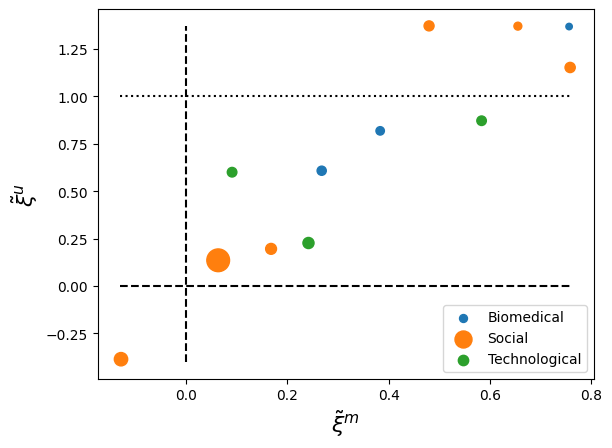

In [21]:
for name, group in bbone.groupby('type'):
    plt.scatter(group.real_diff_metric, group.real_diff_ultrametric, marker='o', s=75*(group.real_density), label=name)

plt.plot([-0.13, 0.76], [0, 0], 'k--')
plt.plot([-0.13, 0.76], [1, 1], 'k:')
plt.plot([0, 0], [-0.4, 1.37], 'k--')
plt.legend()
plt.xlabel(r'$\tilde{\xi}^m$', fontsize=16)
plt.ylabel(r'$\tilde{\xi}^u$', fontsize=16)

# Plot Distortion Distribution

In [11]:
networks

['business-faculty',
 'cs-faculty',
 'history-faculty',
 'caviar-proj',
 'celegans-her',
 'celegans-male',
 'colombia-calls',
 'colombia-mobility',
 'mobility-manizales',
 'mobility-medellin',
 'tennis-loss',
 'yeast-grn',
 'bike-sharing',
 'giraffe',
 'comorbidity',
 'phone-calls',
 'us-airports',
 'DDI',
 'us-weblinks',
 'host-pathogen']

In [19]:
import matplotlib.lines as lines

In [12]:
ordered_networks = ['yeast-grn', 'comorbidity', 'celegans-her', 'celegans-male', 'DDI',
                    'colombia-calls', 'business-faculty', 'history-faculty', 'cs-faculty', 
                    'tennis-loss', 'caviar-proj', 'colombia-mobility', 'mobility-medellin',
                    'mobility-manizales', 'us-airports', 'us-weblinks', 'bike-sharing']

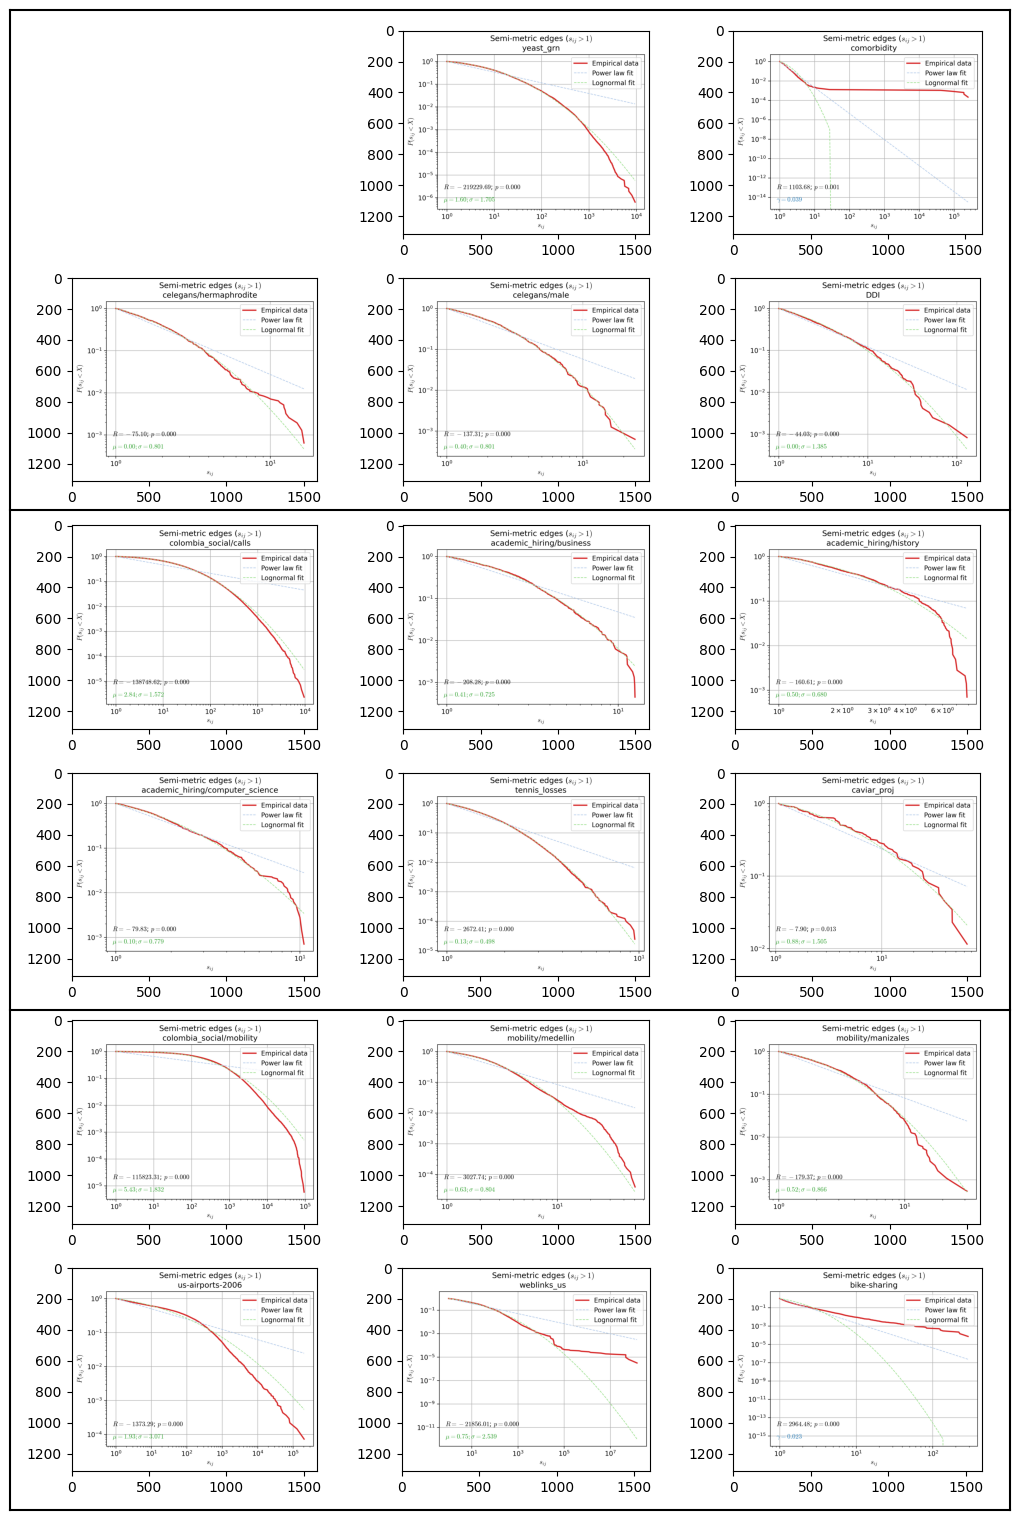

In [37]:
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(10, 15))

idx = 0
jdx = 1

for net in ordered_networks:
    
    folder = config[net].get('folder')
    
    image = plt.imread(f'networks/{folder}/dist-s-values-metric.png')
    ax[idx][jdx].imshow(image)
    
    jdx += 1
    if jdx == 3:
        jdx = 0
        idx += 1

plt.tight_layout()
fig.delaxes(ax[0][0])

# 'Fancy' Border
fig.add_artist(lines.Line2D([0, 1], [0, 0], color='k'))
fig.add_artist(lines.Line2D([0, 0], [0, 1], color='k'))
fig.add_artist(lines.Line2D([1, 1], [1, 0], color='k'))
fig.add_artist(lines.Line2D([1, 0], [1, 1], color='k'))

# Separations
fig.add_artist(lines.Line2D([0, 1], [2/6, 2/6], color='k'))
fig.add_artist(lines.Line2D([0, 1], [4/6, 4/6], color='k'))

#plt.show()
plt.savefig('Summary/Metric_Distortions.pdf', dpi=300)

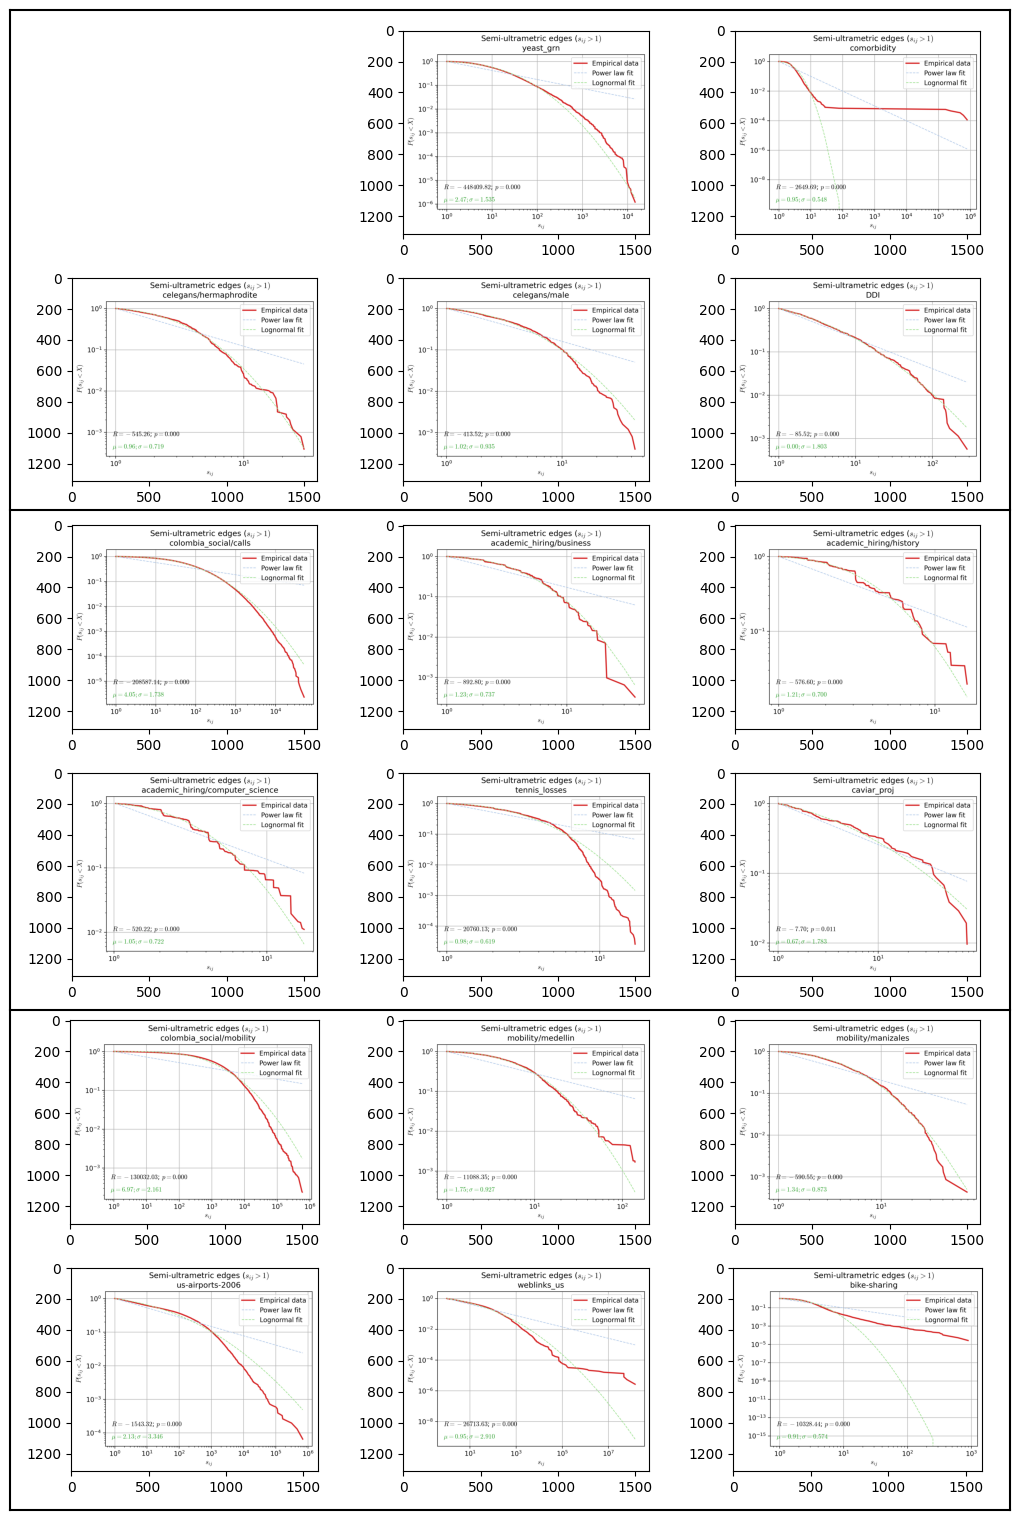

In [38]:
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(10, 15))

idx = 0
jdx = 1

for net in ordered_networks:
    
    folder = config[net].get('folder')
    
    image = plt.imread(f'networks/{folder}/dist-s-values-ultrametric.png')
    ax[idx][jdx].imshow(image)
    
    jdx += 1
    if jdx == 3:
        jdx = 0
        idx += 1

plt.tight_layout()
fig.delaxes(ax[0][0])

# 'Fancy' Border
fig.add_artist(lines.Line2D([0, 1], [0, 0], color='k'))
fig.add_artist(lines.Line2D([0, 0], [0, 1], color='k'))
fig.add_artist(lines.Line2D([1, 1], [1, 0], color='k'))
fig.add_artist(lines.Line2D([1, 0], [1, 1], color='k'))

# Separations
fig.add_artist(lines.Line2D([0, 1], [2/6, 2/6], color='k'))
fig.add_artist(lines.Line2D([0, 1], [4/6, 4/6], color='k'))

#plt.show()
plt.savefig('Summary/UltraMetric_Distortions.pdf', dpi=300)

#### How are the non-reciprocal paths divided?

- Non-reciprocal triangular connection => Those that are originally one-way, and in the backbone
- Non-reciprocal semi-triangular connection => Those that are originally one-way, and NOT in the backbone
- Non-reciprocal path => Those that are originally two-ways, but only one is in the backbone

Do they have different distortion?

Let's consider the LSCC only

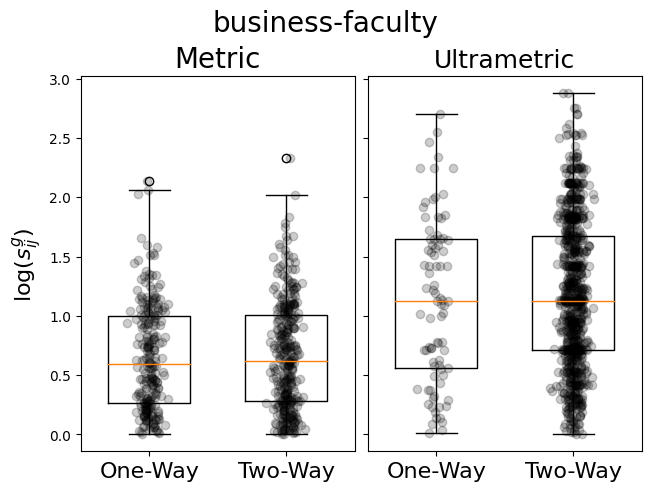

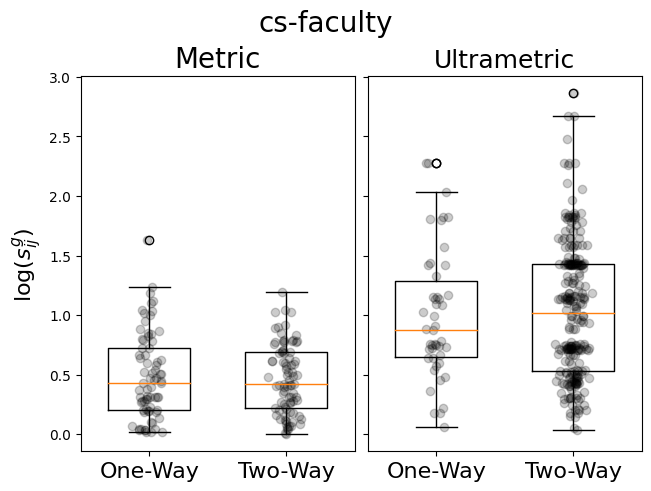

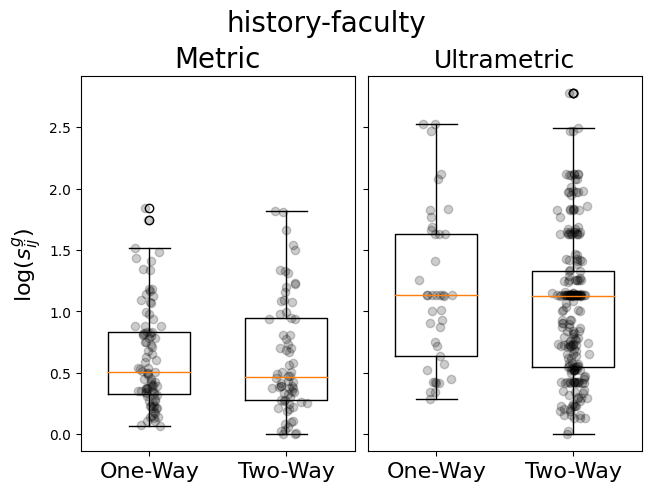

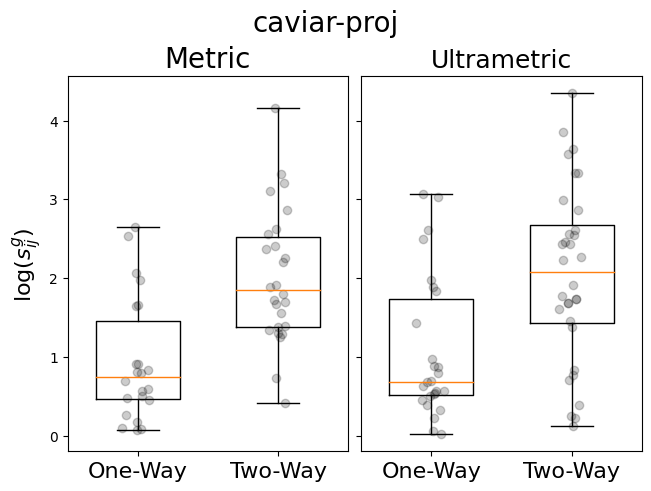

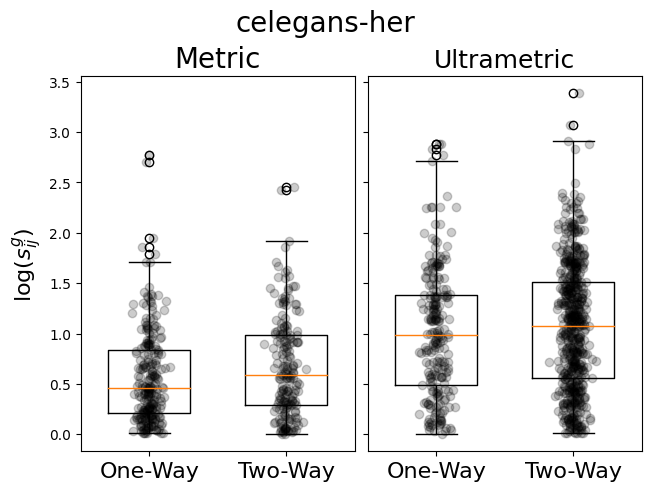

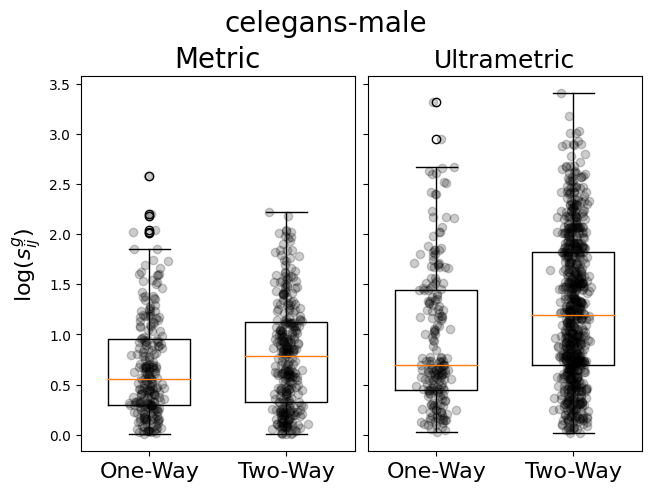

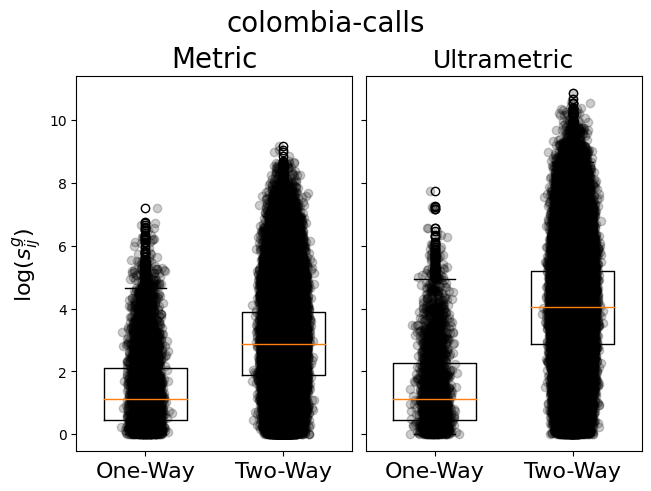

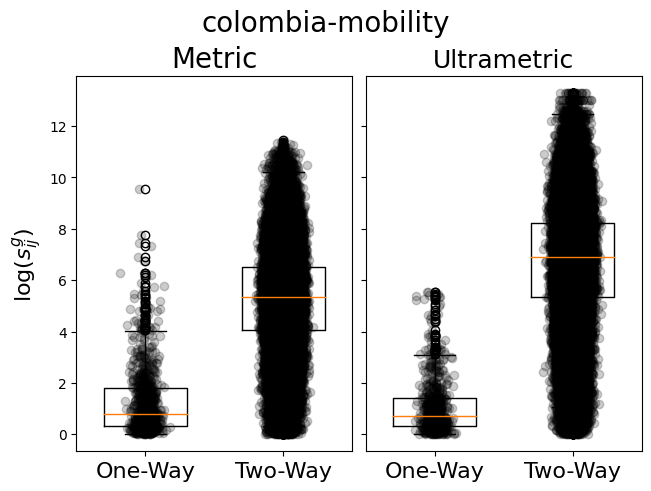

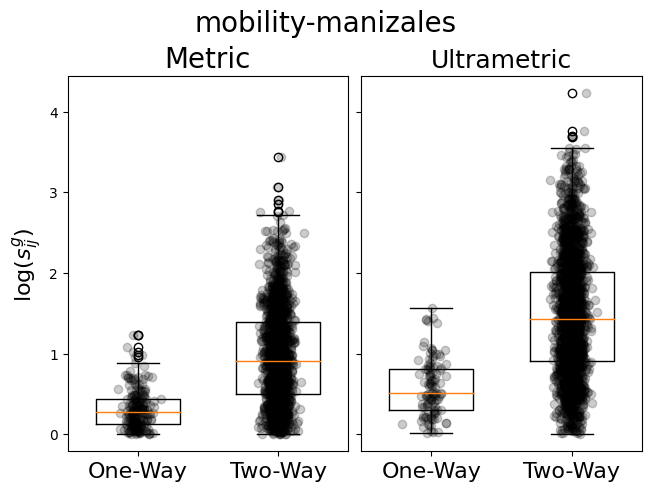

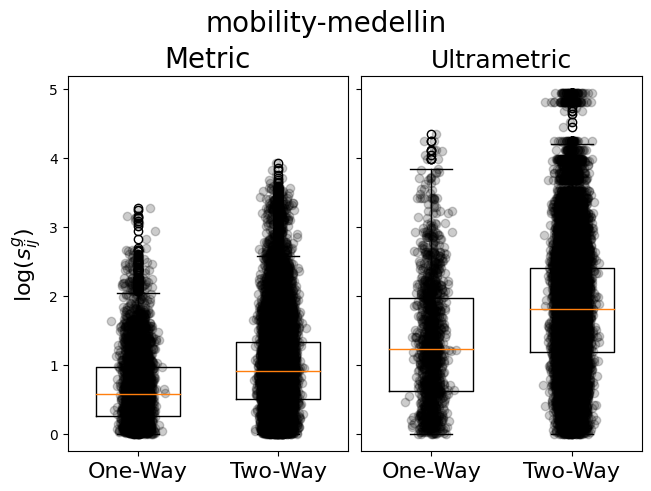

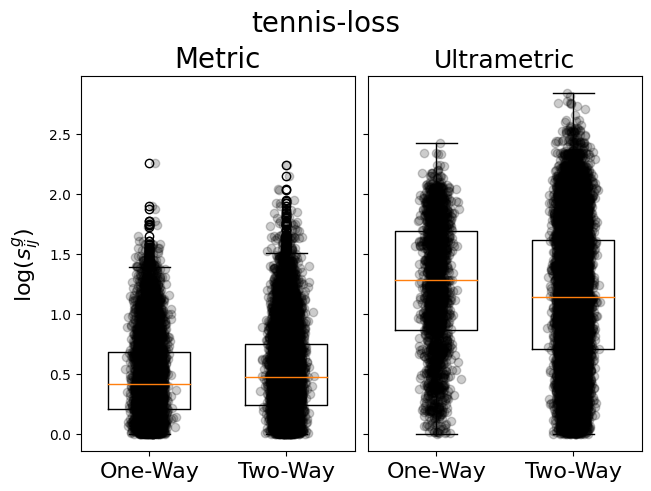

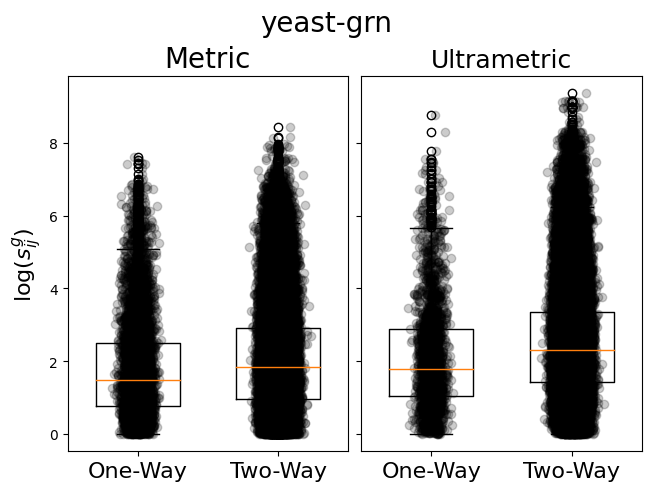

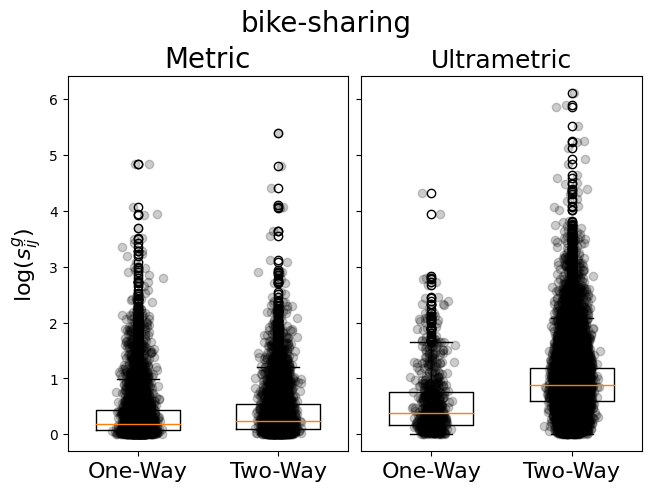

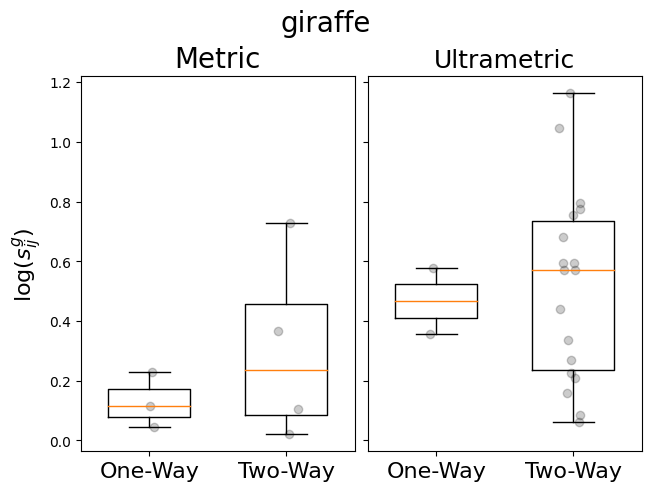

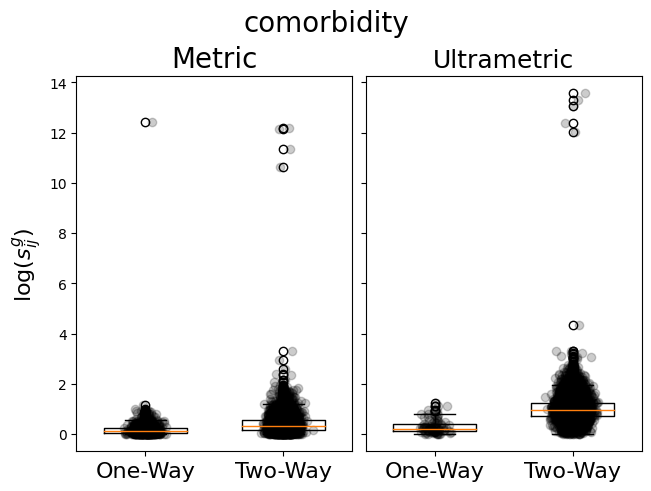

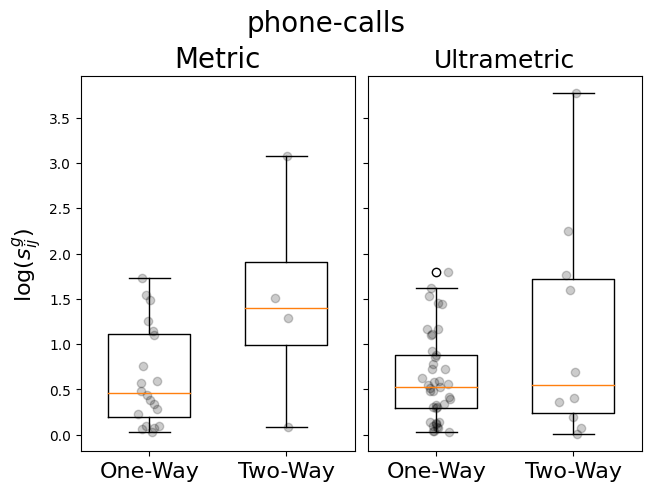

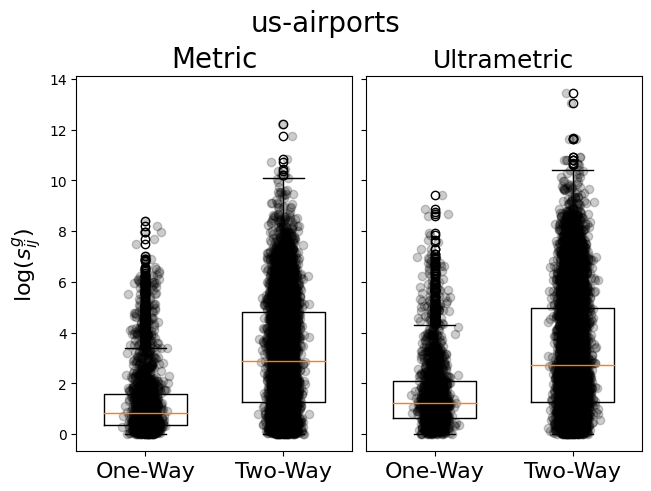

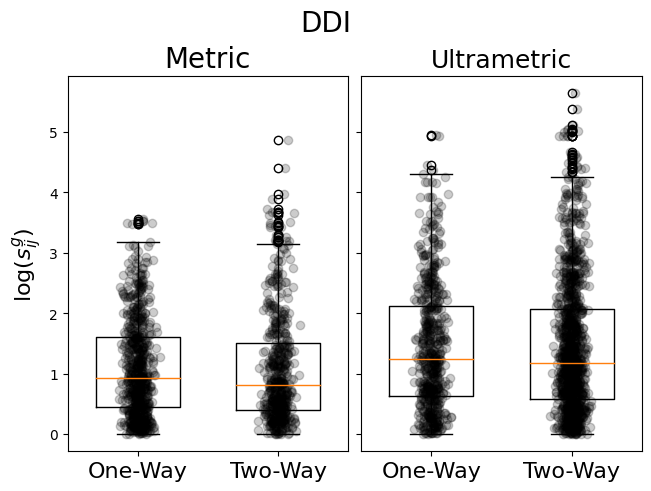

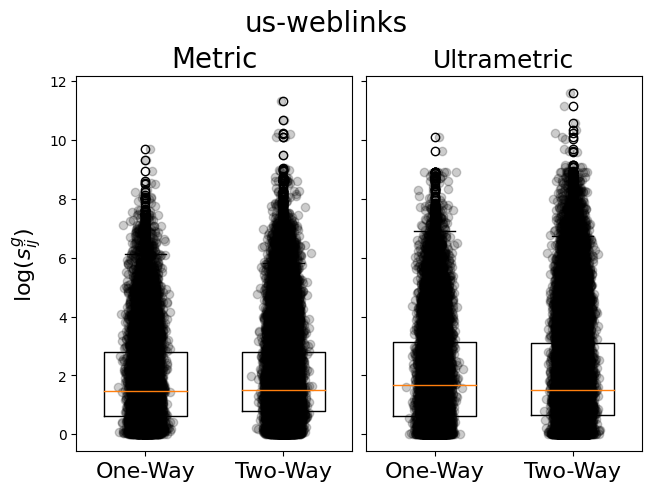

In [28]:
def distortion_groups(svals, D, B):
    sdist_one = []
    sdist_two = []
    for (u, v), s in svals.items():
        if D.has_edge(v, u) and B.has_edge(v, u):
            sdist_one.append(np.log(s))
        elif D.has_edge(v, u):
            sdist_two.append(np.log(s))
    
    return [sdist_one, sdist_two]

for net in networks[:-1]:
    
    fig, ax = plt.subplots(ncols=2, sharey=True, constrained_layout=True)
    
    folder = config[net].get('folder')
    data = pk.load(open(f'networks/{folder:s}/distortion_lscc.pickle', 'rb'))
    
    B = nx.read_graphml(f'networks/{folder}/backbone_lscc.graphml')
    D = nx.read_graphml(f'networks/{folder}/network_lscc.graphml')
    
    ## Metric
    dists_compare = distortion_groups(svals=data['metric'], D=D, B=B)
    #ax[0].violinplot(dists_compare, showmeans=True, showmedians=True)
    ax[0].boxplot(dists_compare, labels=['One-Way', 'Two-Way'], widths=0.6)
    for idx, sval in enumerate(dists_compare):
        ax[0].scatter(np.random.normal(idx+1, 0.05, len(sval)), sval, color='k', marker='o', alpha=0.2)
    ax[0].tick_params(axis='x', labelsize=16)
    ax[0].set_title('Metric', fontsize=20)
    ax[0].set_ylabel(r'$\log(s_{ij}^g)$', fontsize=16)

    B = B.edge_subgraph([(u, v) for u, v, w in B.edges(data='ultrametric') if w])
    dists_compare = distortion_groups(svals=data['ultrametric'], D=D, B=B)
    #ax[1].violinplot(dists_compare, showmeans=True, showmedians=True)
    ax[1].boxplot(dists_compare, labels=['One-Way', 'Two-Way'], widths=0.6)
    for idx, sval in enumerate(dists_compare):
        ax[1].scatter(np.random.normal(idx+1, 0.05, len(sval)), sval, color='k', marker='o', alpha=0.2) 
    ax[1].tick_params(axis='x', labelsize=16)
    ax[1].set_title('Ultrametric', fontsize=18)
    
    plt.suptitle(net, fontsize=20)
    #plt.show()
    plt.savefig(f'networks/{folder}/one_two_way_distortions.png', dpi=300)
    #plt.clf()            
    #break

Is the backbone of tilde(D) a subset of the backbone of D?

In [6]:
for net in networks[:-1]:
    folder = config[net].get('folder')
    
    tilde_B = nx.read_graphml(f'networks/{folder}/directed_scc_backbone.graphml')
    B = nx.read_graphml(f'networks/{folder}/backbone.graphml')
    
    counter = 0
    for u, v in tilde_B.edges():
        counter += int(B.has_edge(u, v))
    
    print(net, tilde_B.number_of_edges(), counter)

business-faculty 590 408
cs-faculty 280 201
history-faculty 239 158
caviar-proj 139 132
celegans-her 854 686
celegans-male 859 723
colombia-calls 11178 11154
colombia-mobility 2970 2970
mobility-manizales 671 671
mobility-medellin 7946 7848
tennis-loss 16604 13747
yeast-grn 12207 8841
bike-sharing 18003 16806
giraffe 23 23
comorbidity 4236 4236
phone-calls 62 54
us-airports 4666 4576
DDI 1750 1750
us-weblinks 60004 49179


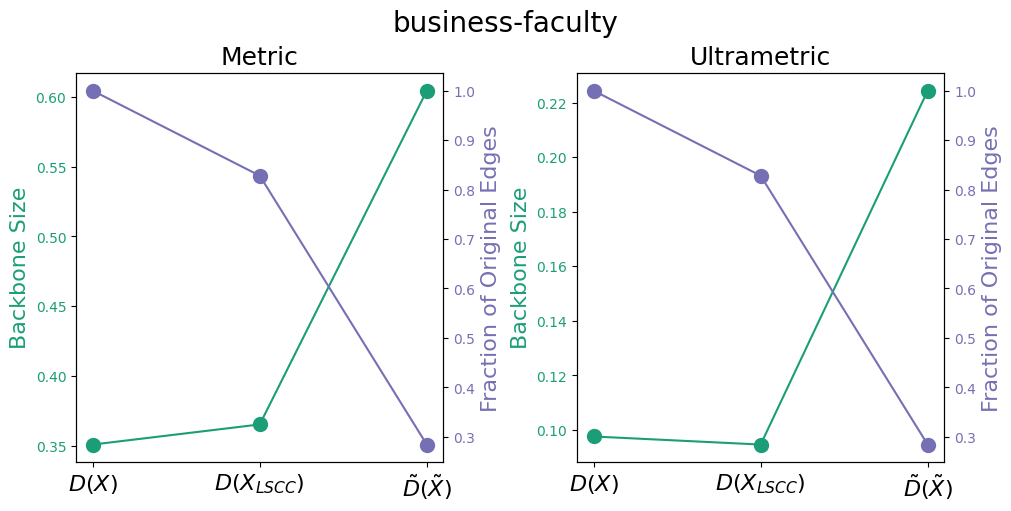

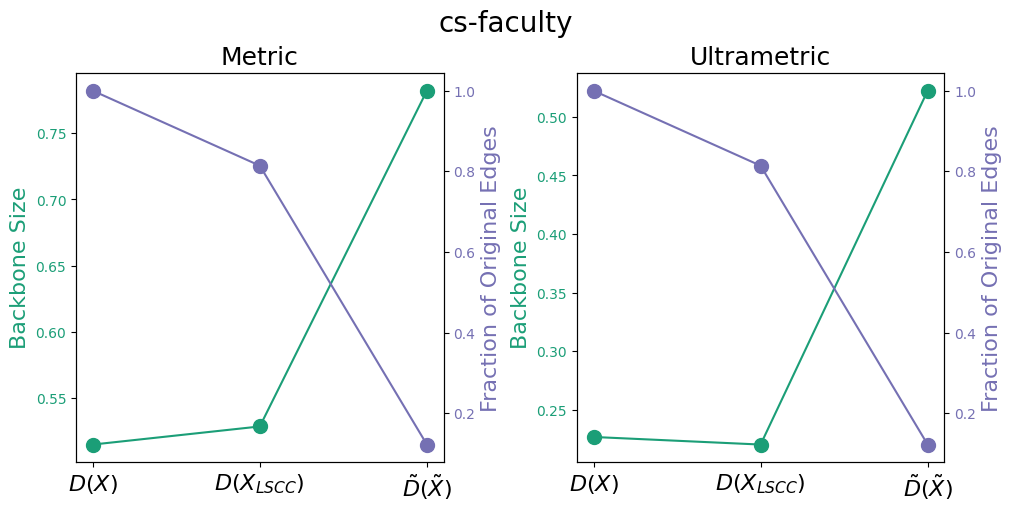

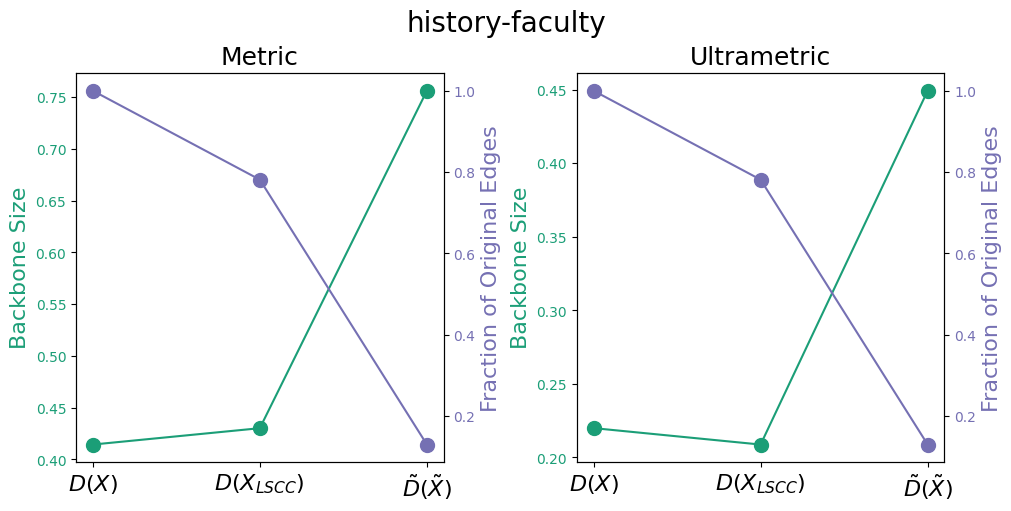

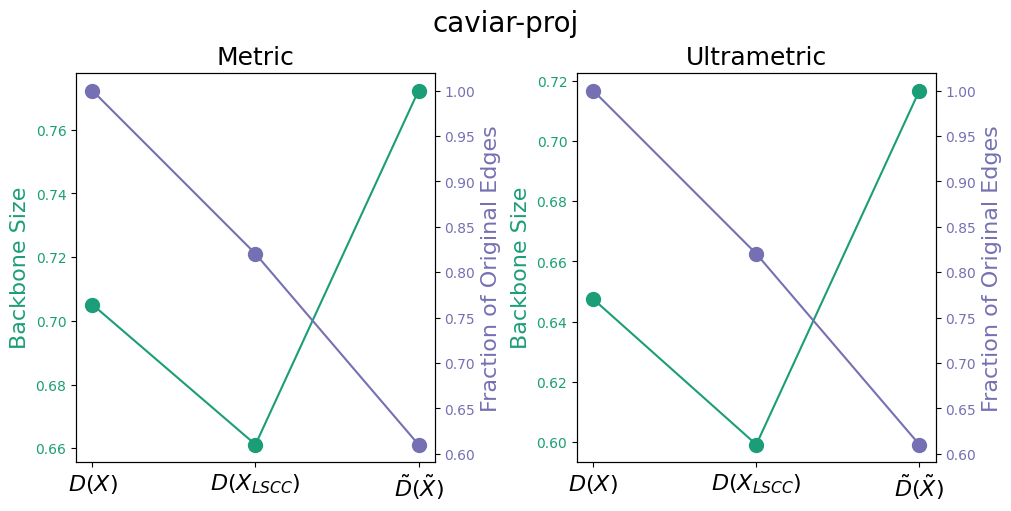

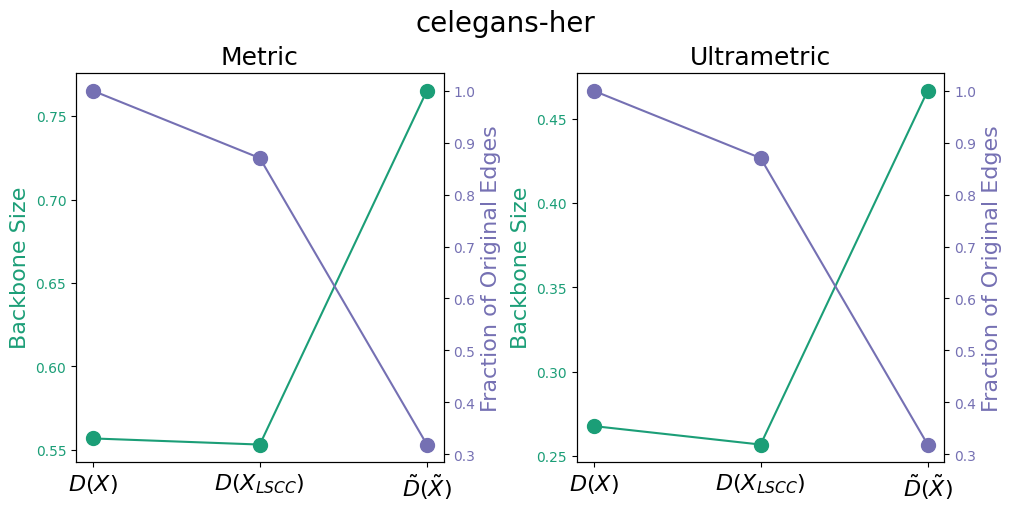

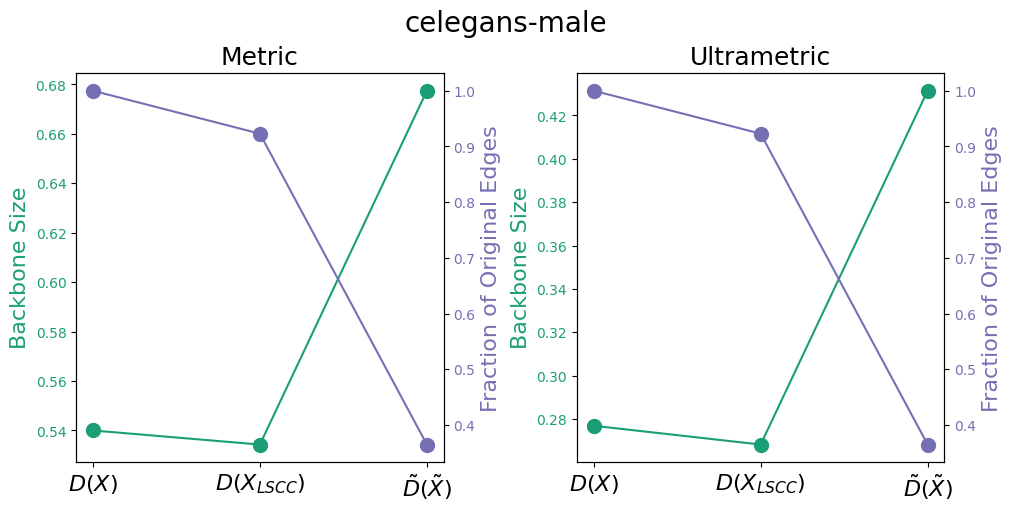

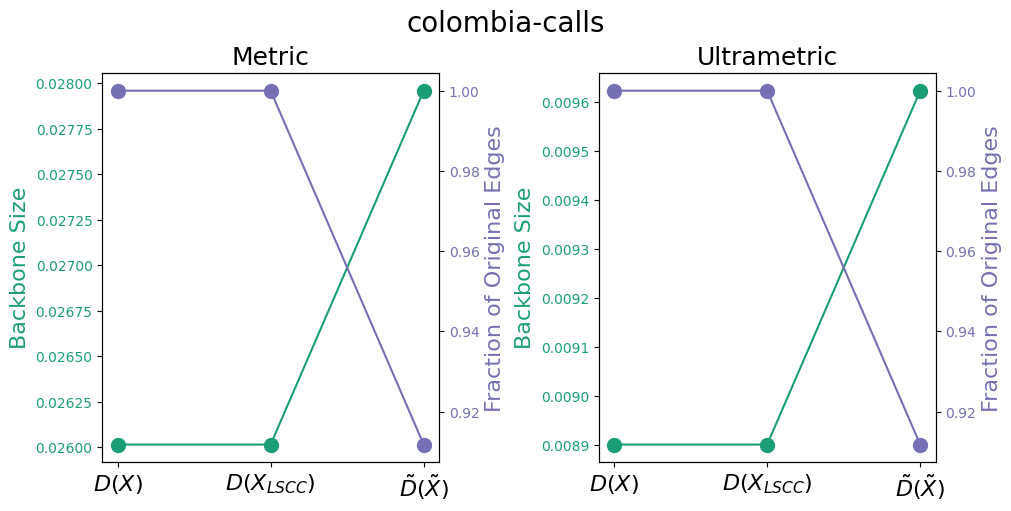

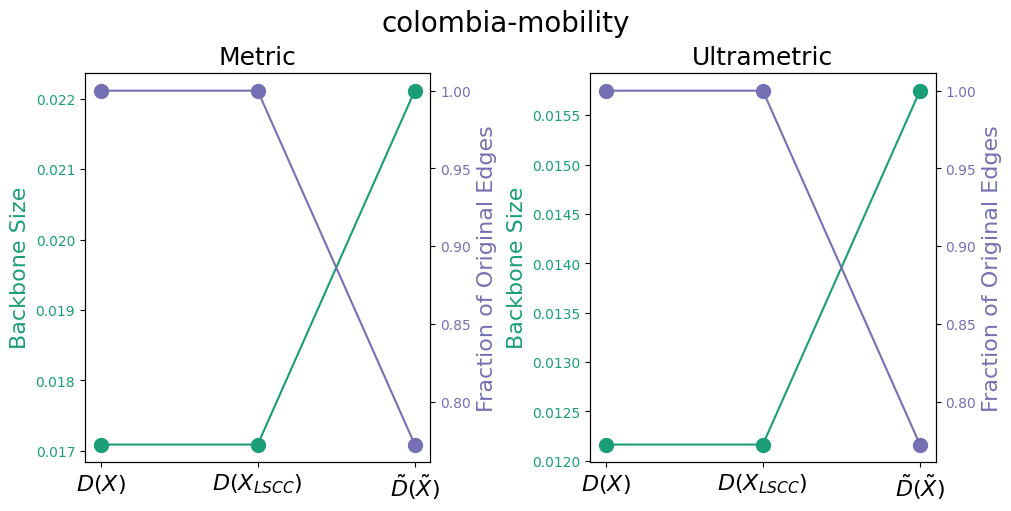

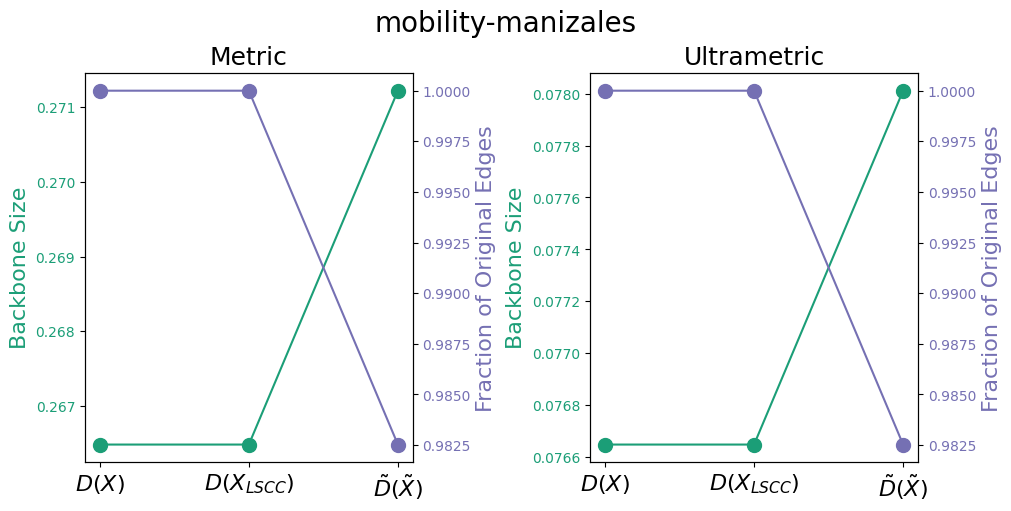

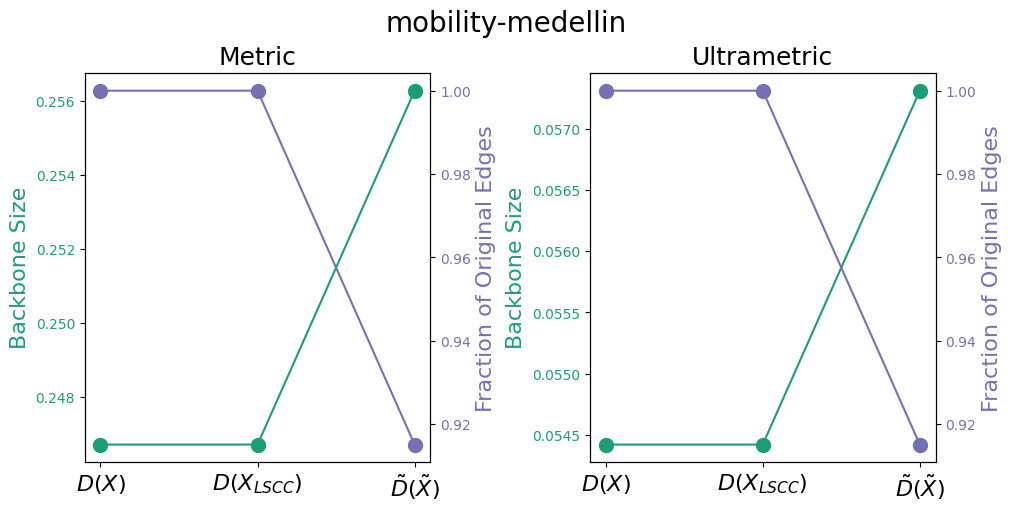

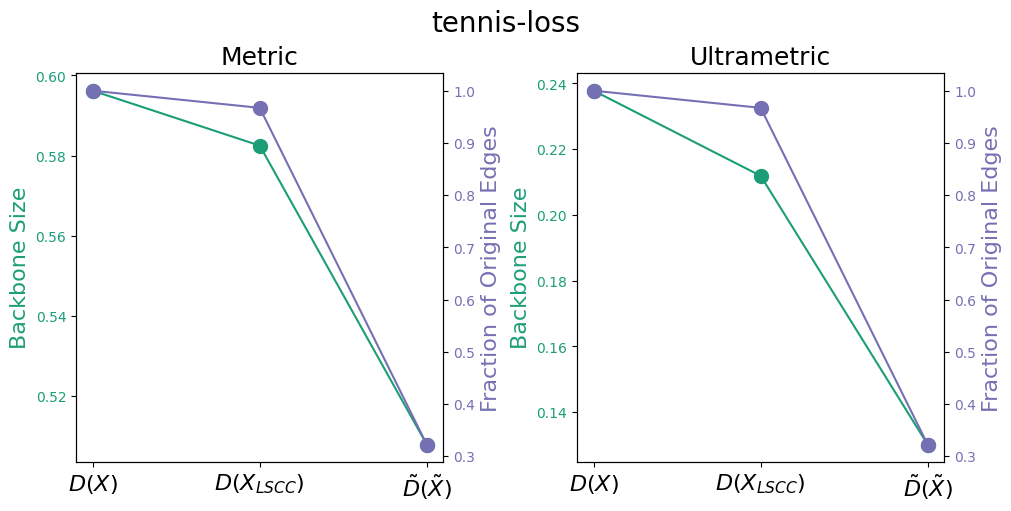

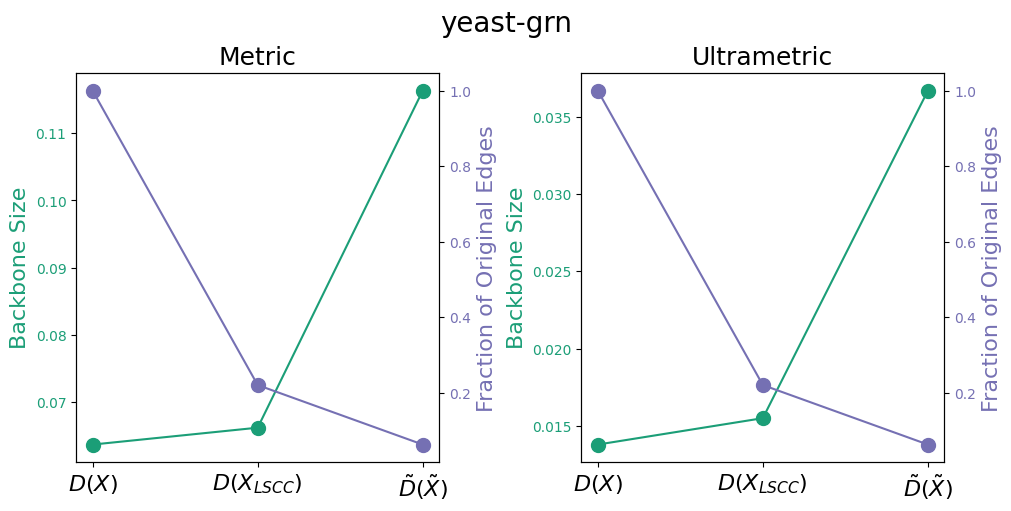

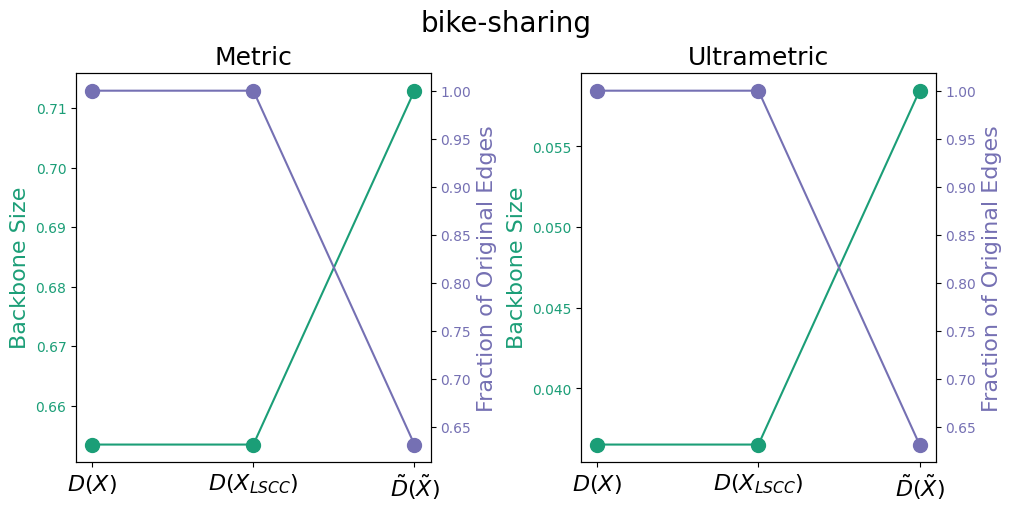

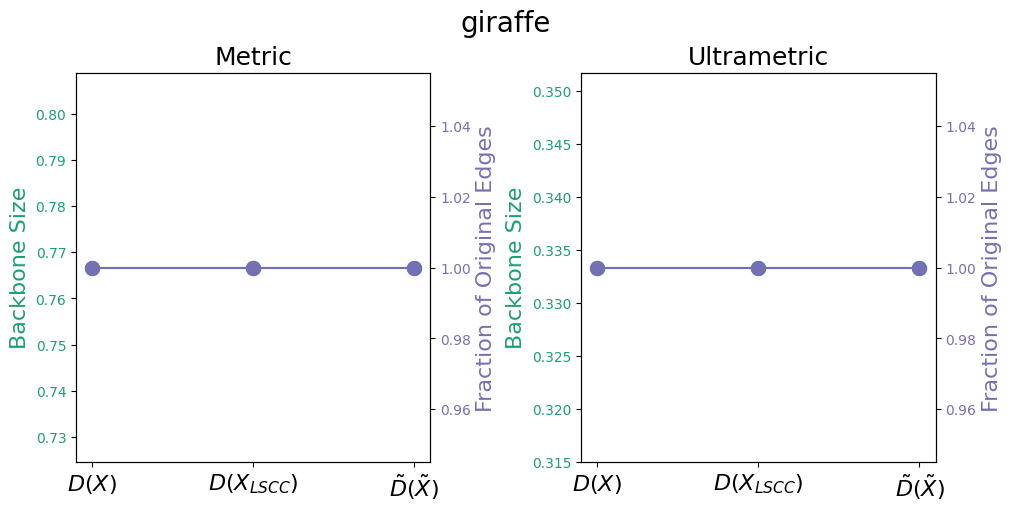

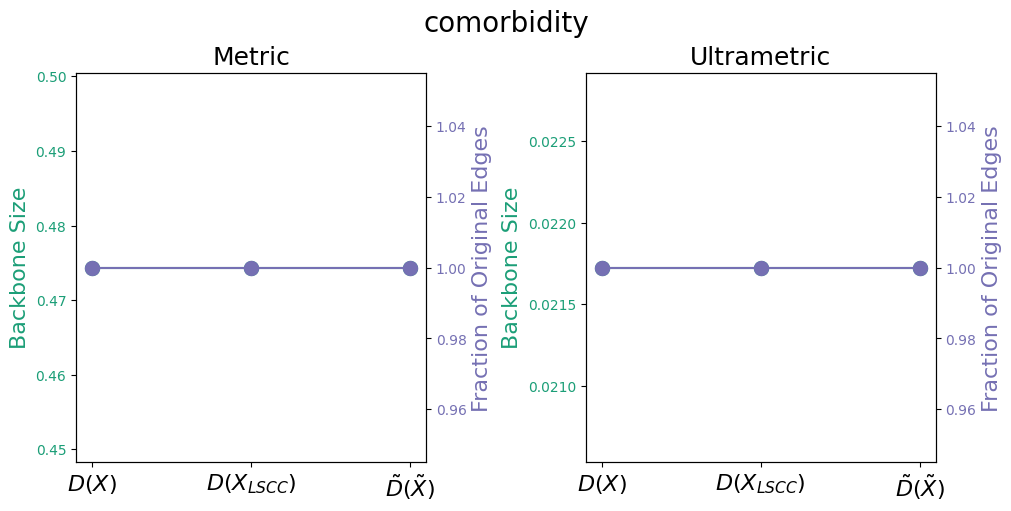

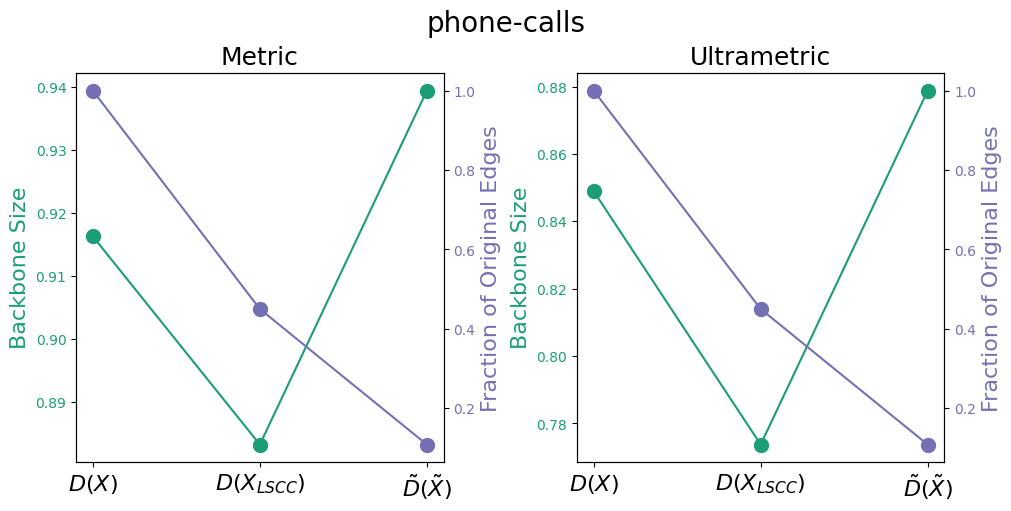

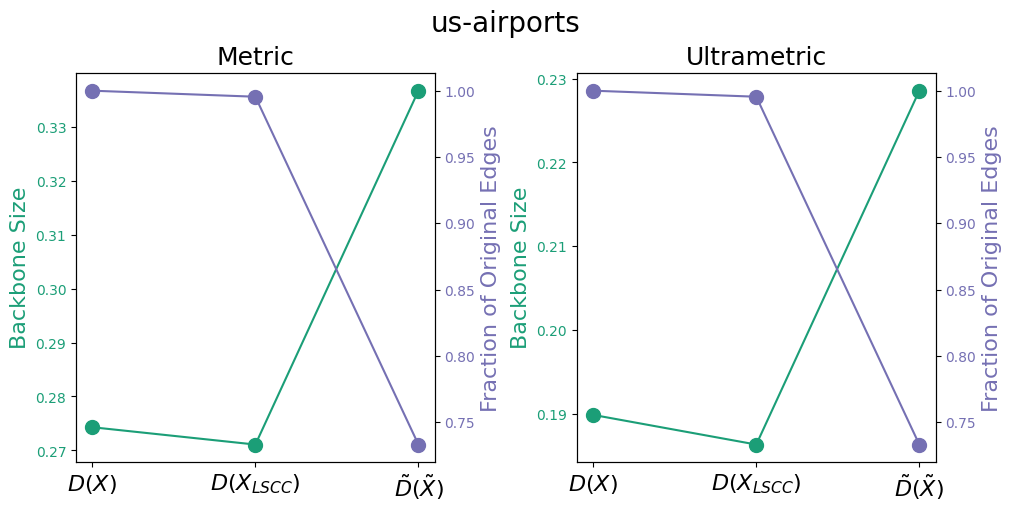

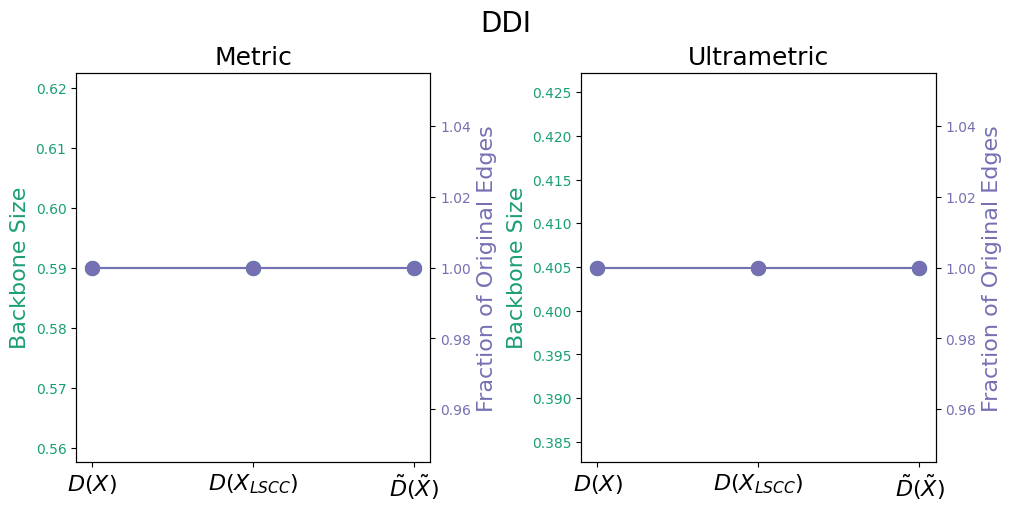

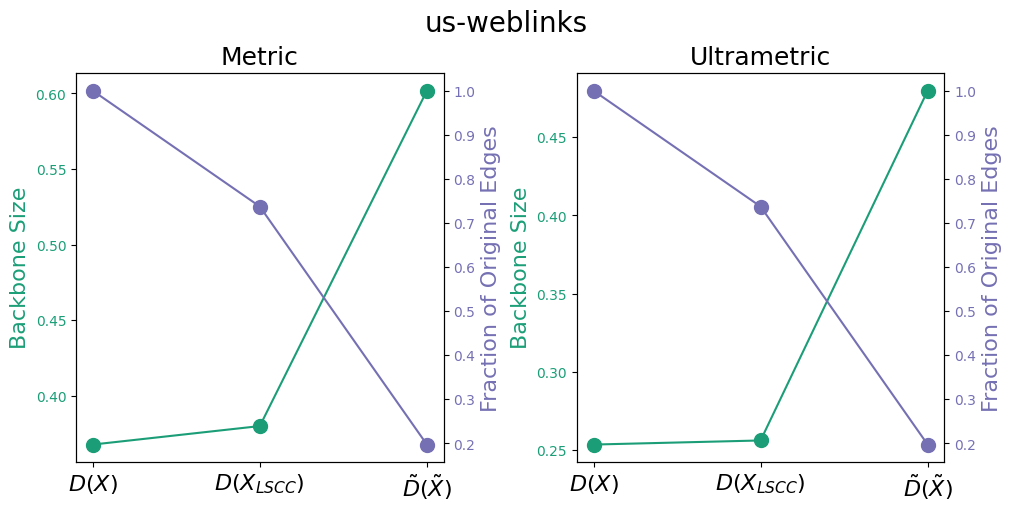

In [36]:
for net in networks[:-1]:
    
    fig, ax = plt.subplots(ncols=2, constrained_layout=True, figsize=(10, 5))
    
    folder = config[net].get('folder')
    
    data = [pd.read_csv(f'networks/{folder}/network-stats.csv', index_col=0), 
            pd.read_csv(f'networks/{folder}/network_lscc-stats.csv', index_col=0),
            pd.read_csv(f'networks/{folder}/undirected-stats.csv', index_col=0).T]
    data[2].rename(columns={"dir_scc": net}, inplace=True)
    
    tau = [[d[net]['nedges_metric']/d[net]['nedges'] for d in data],
                  [d[net]['nedges_ultrametric']/d[net]['nedges'] for d in data]]

    frac_edges = [d[net]['nedges']/data[0][net]['nedges'] for d in data]
    
    for idx in range(2):
            ax[idx].plot(tau[idx], '-o', color='#1b9e77', markersize=10)
            ax[idx].set_ylabel('Backbone Size', color='#1b9e77', fontsize=16)
            ax[idx].tick_params(axis='y', labelcolor='#1b9e77')
            
            bx = ax[idx].twinx()
            bx.plot(frac_edges, '-o', color='#7570b3', markersize=10)
            bx.set_ylabel('Fraction of Original Edges', color='#7570b3', fontsize=16)
            bx.tick_params(axis='y', labelcolor='#7570b3')
            
            ax[idx].xaxis.set_ticks([0, 1, 2], labels=[r'$D(X)$', r'$D(X_{LSCC})$', r'$\tilde{D}(\tilde{X})$'], fontsize=16)
            
            #ax[idx].set_xtickslabel(['WCC', 'LSCC', 'Tilde'])    
    
    ax[0].set_title('Metric', fontsize=18)
    ax[1].set_title('Ultrametric', fontsize=18)   
    plt.suptitle(net, fontsize=20)
    #plt.show()
    plt.savefig(f'networks/{folder}/assymetry_removal_progression.png', dpi=300)
    #plt.clf()            
    #break